<h1 aling='center'>Exercício 6  – Inversão Simultânea (GGF2013)	</h1>

<h3 aling='justify'> O objetivo	  deste	  exercício	é aprender a usar o	aplicativo de inversão simultânea de funções de   receptor	 e	   curvas de dispersão, implementada através   do  aplicativo  jointmsth.  O aplicativo	 implementa o esquema de inversão linearizada descrito	em Julià  et	   al.	   (2000) para	 determinar	  o	  perfil de velocidade  de	onda S	local à estação sísmica.	</h3> 

<h3 aling='justify'>Importando os módulos utilizados</h3>

In [1]:
import numpy as np
import obspy as op
import os
import shutil
import matplotlib.pyplot as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline

<h4>Mudando o diretório de trabalho</h4>   

In [565]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/')

<h3 aling='justify'>Cálculo dos dados sintéticos:	</h3> 

<h5 aling='justify'>Calcular   funções	  de	  receptor	  e	  curvas de   dispersão	   (Love	   e	   Rayleigh)	   para	  um	  modelo	   de	   Terra	   com	   uma	   crosta	   de	   duas	  camadas:	  $V_{p1}$ = 6.5	  km/s	  e	  $h_{1}$ = 20	  km,	  $V_{p2}$ = 6.8	  km/s	  e	  $h_{2}$ = 20	  km,	  e	  um	  manto superior	  de   $V_{p}$ = 8.1	  km/s.	  Assumir	  uma	  razão	  de	  Poisson	  de	  0,25	  para	  todas	  as	  camadas.	  Usar	  um filtro	  gaussiano	  de	  a=2.5	   e	   um	   parâmetro	   do	   raio	  de	   valor	   p=0.05 s/km.   Cortar	  a	  função	   de	   receptor	   entre	   -5	   e	   40	   s; calcular as    velocidades de	   dispersão	   para	  períodos	  entre	  10	  e	  60 s.</h5>

<h5>Criando o modelo de velocidade</h5>

In [535]:
model_true = ['5', '1', '1','6.5 20','6.8 20','8.1 0','y','model.true','modelo verdadeiro']
np.savetxt('model_true.txt',model_true,fmt='%s')
os.system('icmod < model_true.txt')

0

<h4>Calculando o modelo de velocidade para onda P,S e rho com o aplicativo VPLOT</h4>

In [536]:
vplot_true = ['model.true', 'y']
np.savetxt('vplot_true.txt',vplot_true,fmt='%s')
os.system('vplot < vplot_true.txt')
os.system('sac2xy 2 model.true.vs > model_true_vs.txt')
os.system('sac2xy 2 model.true.vp > model_true_vp.txt')
os.system('sac2xy 2 model.true.rho > model_true_rho.txt')

0

<h5>Plotando o modelo de velocidade verdadeiro</h5>

In [537]:
model_true_vp = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea//1/model_true_vp.txt')
model_true_vs = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea//1/model_true_vs.txt')
model_true_rho = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/model_true_rho.txt')

In [538]:
vp_true = model_true_vp[:,0]
H_true_vp = (-1)*model_true_vp[:,1]
vs_true = model_true_vs[:,0]
H_true_vs = (-1)*model_true_vs[:,1]
rho_true = model_true_rho[:,0]
H_true_rhos = (-1)*model_true_rho[:,1]

model_vpvsrho = [vp_true,vs_true,rho_true]
model_Hvpvsrho = [H_true_vp,H_true_vs,H_true_rhos]
model_label = ['model.true.vp','model.true.vs','model.true.rho']
model_xlabel = ['Velocidade - P (km/s)','Velocidade - S (km/s)', 'Densidade (kg/m³)']

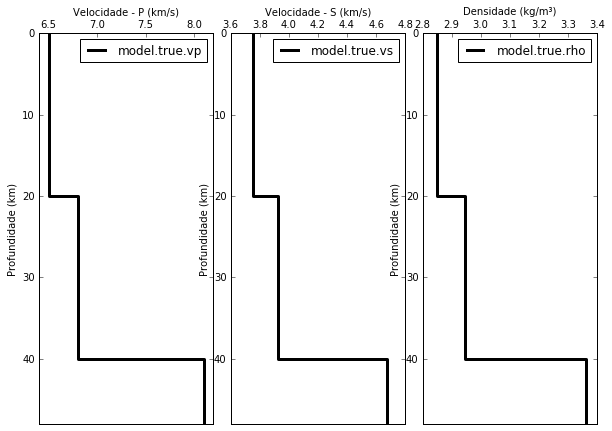

In [539]:
mpl.figure(figsize = (10,7))
gs1 = gridspec.GridSpec(1,3)
gs1.update(wspace=0.1, hspace=0.4)
for i,j in enumerate(model_vpvsrho):
    ax1 = mpl.subplot(gs1[i])
    ax1.step(j,model_Hvpvsrho[i],'k',lw = 3,where='post',label=model_label[i])
    ax1.set_xlabel(model_xlabel[i])
    ax1.set_ylabel('Profundidade (km)')
    ax1.xaxis.tick_top()
    ax1.set_ylim([48,0])
    ax1.xaxis.set_label_position('top') 
    ax1.legend(loc=0)
mpl.savefig('modelo_1.svg',format='svg',dpi=400)

<h5>Calculando a Função do Receptor para o modelo de velocidade acima</h5>

<h6>Programa respknt</h6>

In [523]:
respknt_true = ['model.true', 'y','1','0.1','45','0.05','f','y']
np.savetxt('respknt_true.txt',respknt_true,fmt='%s')
os.system('respknt < respknt_true.txt')

0

<h6>Programa pwaveqn</h6>

In [524]:
pwaveqn_true = ['model.true', 'n','n','model.true','0','2.5','5','n']
np.savetxt('pwaveqn_true.txt',pwaveqn_true,fmt='%s')
os.system('pwaveqn < pwaveqn_true.txt')

0

<h5>Plotando a Função do Receptor para o modelo de velocidade verdadeiro</h5>

In [566]:
RF = op.read('model.true.eqr')

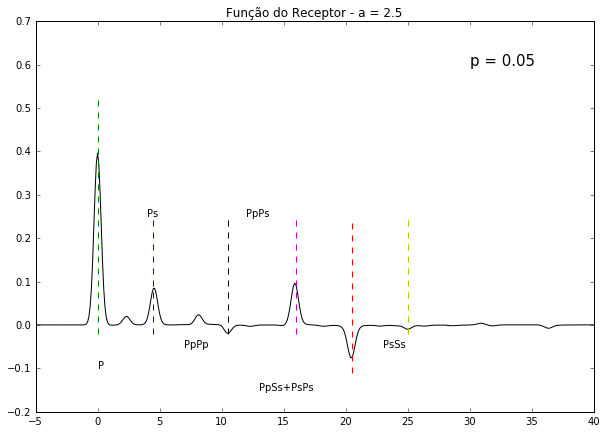

In [567]:
mpl.figure(figsize = (10,7))
ax1 = mpl.subplot()
ax1.plot(RF[0].times()-5,RF[0].data,'k')
ax1.set_title('Função do Receptor - a = 2.5')
ax1.text(30,0.6,'p = 0.05',fontsize=15)
ax1.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
ax1.text(0, -0.1, 'P')
ax1.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
ax1.text(4, 0.25, 'Ps')
ax1.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
ax1.text(7, -0.05, 'PpPp')    
ax1.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
ax1.text(12, 0.25, 'PpPs')
ax1.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
ax1.text(13, -0.15, 'PpSs+PsPs')
ax1.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
ax1.text(23, -0.05, 'PsSs')
ax1.set_xlim(-5,40)
ax1.set_ylim(-0.2,0.7)
mpl.savefig('RF_modelo_1.svg',format='svg',dpi=400)

<h5>Calculando as curvas de dispersão  através do programa 'dosrf'</h5>

In [423]:
periods = np.arange(10,65,5)
np.savetxt('list',periods,fmt='%0.0f')
os.system('dosrf model.true < list')

0

<h5>Renomeando os arquivos gerados pelo do programa 'dosrf'</h5>

In [424]:
dosrf_name = ['clove', 'ulove', 'crayl', 'urayl']
for i,j in enumerate(dosrf_name):
    os.rename(j+'.sac',j+'.true')

<h5>Plotando as Curvas de Dispersão para o modelo de velocidade verdadeiro</h5>

In [425]:
for i,j in enumerate(dosrf_name):
    os.system('sac2xy 2 '+j+'.true > '+j+'true.txt')
disp_curves = []
periods = []
for i in dosrf_name:
    periods.append((np.genfromtxt(i+'true.txt'))[:,0])
    disp_curves.append((np.genfromtxt(i+'true.txt'))[:,1])

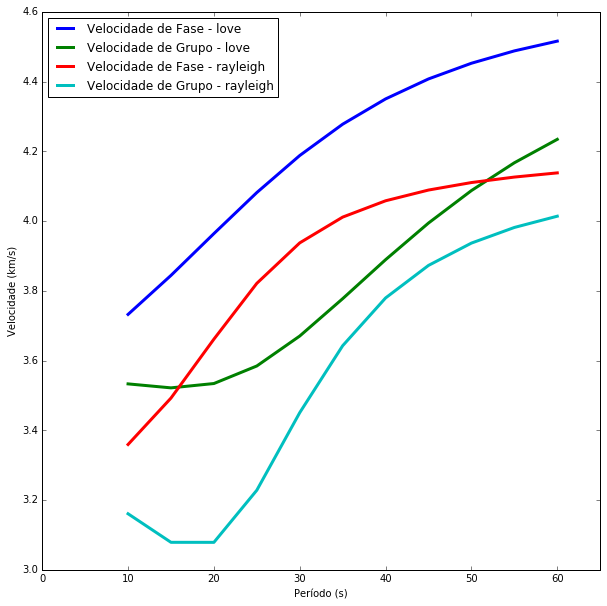

In [426]:
dosrf_label = ['Velocidade de Fase - love', 'Velocidade de Grupo - love', 'Velocidade de Fase - rayleigh', 'Velocidade de Grupo - rayleigh']
mpl.figure(figsize = (10,10))
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(disp_curves):
    ax1 = mpl.subplot(gs1[0])
    ax1.plot(periods[i],j,lw=3,label=dosrf_label[i])
    ax1.set_xlabel('Período (s)')
    ax1.set_ylabel('Velocidade (km/s)')   
    ax1.set_xlim(0,65)
    ax1.set_ylim(3,4.6)
    ax1.legend(loc=0)
mpl.savefig('CD_modelo_1.svg',format='svg',dpi=400)

<h3 aling='justify'>1. Usar	   as	   24	   perturbações	   do	   modelo	   inicial	   obtidas	   no	   exercício	   3	  durante	   a	   inversão	  pelo	  método	  de	  Ammon	  et	  al.	  (1990)	  e	   fazer	  a	inversão	  simultânea	  partindo	 de	 cada	  um	  deles.	   Usar	   um	   parâmetro	   de	   influência	   de	   0.5	   e	   um	  parâmetro	   de	   suavidade	   de	   0.1.	  Mostrar	   os	  resultados	   superpondo	   o	   modelo	final	   ao	   modelo	   verdadeiro	   para	  cada	  inversão.	  Discutir	  se	  a	  inversão	  tem	 problemas	  de	  no‐unicidade.	</h3>   

<h4>Procurando os modelos do exerício 3</h4>   

In [19]:
inv_list = []
for root, dirs, files in os.walk('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/3_Inversao_FR/Exerc3_model/'):
    for invfile in files:
        if invfile.startswith('inv.mdl.'):
            inv_list.append(os.path.join(root, invfile))
inv_listS = sorted(inv_list)

In [20]:
inv_list2 = []
for inv_file in inv_listS:
        if inv_file.endswith('00'):
            inv_list2.append(inv_file)

<h4>Renomeando os modelos do exerício 3</h4>   

In [21]:
vp_model = [np.genfromtxt(i,skip_header=1,usecols=1) for i in inv_list2]
vp_modellabel = [i.split('model/')[1] for i in inv_list2]

vp_model1 = [vp_model[i:i+4] for i in range(0, len(vp_model), 4)]
vp_modellabel1 = [vp_modellabel[i:i+4] for i in range(0, len(vp_modellabel), 4)]
H = np.arange(0,50,2)
H_model = [H]*25
H_model1 = [H_model]*5

<h4>Salvando os modelos do exerício 3 em *.ini</h4>   

In [22]:
vp_model_ini = [np.genfromtxt(i,skip_header=1) for i in inv_list2]

for i,j in enumerate(vp_modellabel):
    shutil.copy2(inv_list2[i],'/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'.ini')

<h3>*  Precisa	  mudar	  a	  1ª	  linha	  do	  arquivo	  inv.mdl.0100	  para	  acrescentar	  um	 espaço	  entre	  o	  número	  de	  linhas	  e	  a	  descrição	  do	  modelo.</h3>   

<h4>Plotando os modelos do exerício 3</h4>   

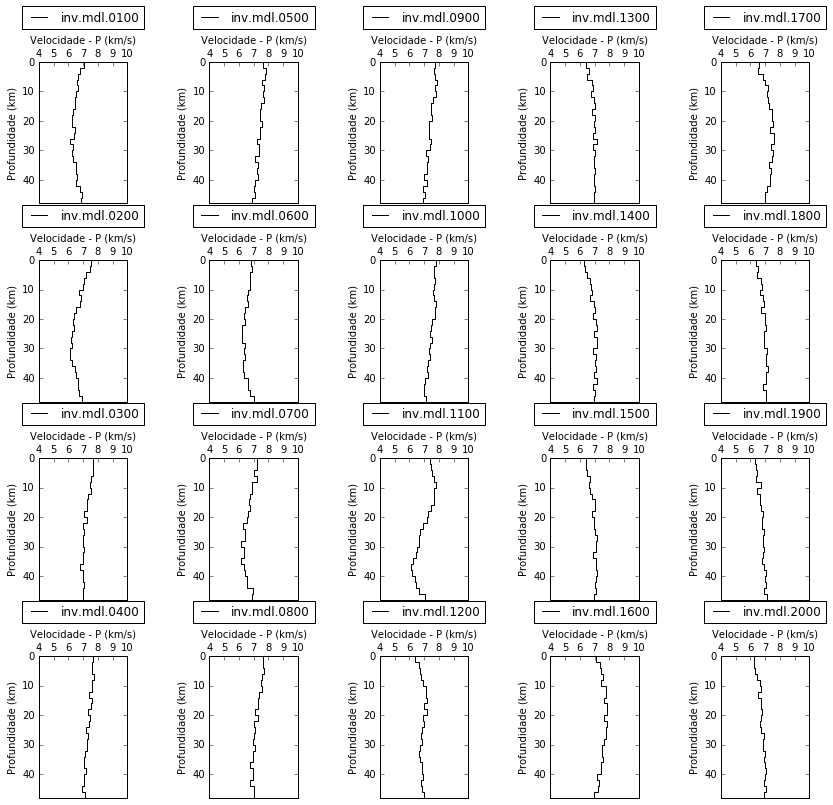

In [23]:
mpl.figure(figsize = (15,70))
gs1 = gridspec.GridSpec(len(vp_model),len(vp_model1))
gs1.update(wspace=0.1, hspace=0.4)
for i,j in enumerate(vp_model1):
    for h in range(len(vp_model1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.step(j[h],H_model1[i][h],'k',where='post',label=vp_modellabel1[i][h])
        ax1.set_xlabel('Velocidade - P (km/s)')
        ax1.set_ylabel('Profundidade (km)')
        ax1.xaxis.tick_top()
        ax1.set_xlim([4,10])
        ax1.set_ylim([48,0])
        ax1.xaxis.set_label_position('top') 
        ax1.set_aspect(0.2)
        ax1.legend(bbox_to_anchor=(0.5, 1.4), loc=9, borderaxespad=0.1)
mpl.savefig('modelo_inicial.svg',format='svg',dpi=500)

<h4>Criando os três arquivos de controle</h4> 

In [29]:
obsr = ['1','"model.true.eqr"','0.05','2.5','5.']
obsd = ['2','"ulove.true"','2.0 5.0 0.05 0.0001 10','"urayl.true"','2.0 5.0 0.05 0.0001 10']
obsj = ['6','0.5','0.1','-1.0','-1.0', '55', '0.0']
np.savetxt('obs.r',obsr,fmt='%s')
np.savetxt('obs.d',obsd,fmt='%s')
np.savetxt('obs.j',obsj,fmt='%s')

<h4>Criando uma pasta para cada modelo inicial e movendo os arquivos para cada pasta</h4>

In [ ]:
for i,j in enumerate(vp_modellabel):
    os.mkdir(j)
    shutil.move('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'.ini','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/model.ini')

In [ ]:
for i,j in enumerate(vp_modellabel):
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/model.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/model.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/clove.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/clove.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/crayl.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/crayl.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/ulove.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/ulove.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/urayl.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/urayl.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/model.true.eqr','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/model.true.eqr')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/obs.d','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/obs.d')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/obs.j','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/obs.j')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/obs.r','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/1/'+j+'/obs.r')

<h4>Transformar do  formato  TJO  para  o  formato  JJC  usando  o  aplicativo   tjo2jjc e rodando o  aplicativo de inversão jointsmth em cada pasta</h4>

In [ ]:
for i,j in enumerate(vp_modellabel):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j)
    os.system('tjo2jjc < model.ini > model.0')
    os.system('jointsmth')

<h3>Transformando os modelos utilizados nas interações da inversão jointsmth em .txt para poder plotar os dados</h3>   

In [ ]:
for i,j in enumerate(vp_modellabel):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j)
    os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
    os.system('sac2xy 2 model.1.vs > model_1_vs.txt')
    os.system('sac2xy 2 model.2.vs > model_2_vs.txt')
    os.system('sac2xy 2 model.3.vs > model_3_vs.txt')
    os.system('sac2xy 2 model.4.vs > model_4_vs.txt')
    os.system('sac2xy 2 model.5.vs > model_5_vs.txt')
    os.system('sac2xy 2 model.6.vs > model_6_vs.txt')

<h2>Plotando os modelos calculados através da inversão joinsth</h2>   

<h4>Mudando o diretório de trabalho</h4>   

In [24]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/')

<h4>Importando os modelos de velocidades gerados pela sexta interação da inversão jointsmth</h4>

In [25]:
model_joint_0 = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'/model_0_vs.txt') for j in vp_modellabel]
model_joint = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'/model_6_vs.txt') for j in vp_modellabel]

In [26]:
vs = []
prof = []
for i,j in enumerate(model_joint):
    vs.append(j[:,0])
    prof.append((-1)*(j[:,1]))

vs_0 = []
prof_0 = []
for i,j in enumerate(model_joint_0):
    vs_0.append(j[:,0])
    prof_0.append((-1)*(j[:,1]))

In [27]:
prof1 = [prof[i:i+4] for i in range(0, len(prof), 4)]
vs1 = [vs[i:i+4] for i in range(0, len(vs), 4)]
vp_modellabel1 = [vp_modellabel[i:i+4] for i in range(0, len(vp_modellabel), 4)]

prof_01 = [prof_0[i:i+4] for i in range(0, len(prof_0), 4)]
vs_01 = [vs_0[i:i+4] for i in range(0, len(vs_0), 4)]

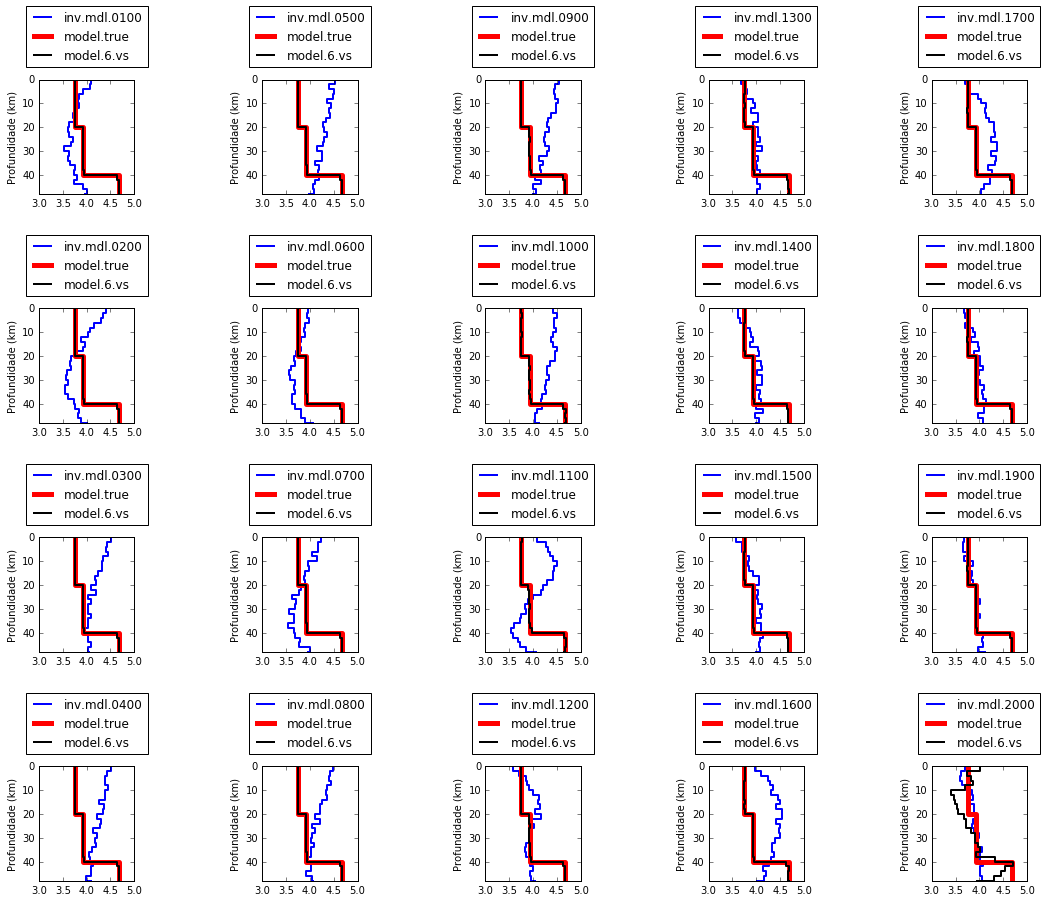

In [28]:
fig = mpl.figure(figsize = (20,80))
gs1 = gridspec.GridSpec(len(vs),len(vs1))
gs1.update(wspace=0, hspace=1)
for i,j in enumerate(vs1):
    for h in range(len(vs1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.step(vs_01[i][h],prof_01[i][h],'b',lw= 2, where='post',label=vp_modellabel1[i][h])
        ax1.step(vs_true,H_true_vs,'r',lw=5,where='post',label='model.true')
        ax1.step(j[h],prof1[i][h],'k',lw=2,where='post',label='model.6.vs')
        ax1.set_ylabel('Profundidade (km)')
        ax1.set_xlim([3,5])
        ax1.set_ylim([48,0])
        ax1.set_aspect(0.05)
        ax1.legend(bbox_to_anchor=(0.5, 1.65), loc=9, borderaxespad=0.1)
mpl.savefig('modelo_joint_1.svg',format='svg',dpi=500)

<h2>Plotando as Funções do Receptor calculados através da inversão jointsmth</h2>   

<h4>Importando as Funções do Receptor calculadas pela sexta interação da inversão jointsmth</h4>

In [29]:
RF_joint_6 = [op.read('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'/syn.6.rftn') for j in vp_modellabel]

In [30]:
RF_joint_6_data = []
RF_joint_6_time = []
for i,j in enumerate(RF_joint_6):
    a = j[0]
    RF_joint_6_data.append(a.data)
    RF_joint_6_time.append(a.times())

In [31]:
RF_joint_6_data1 = [RF_joint_6_data[i:i+4] for i in range(0, len(RF_joint_6_data), 4)]
RF_joint_6_time1 = [RF_joint_6_time[i:i+4] for i in range(0, len(RF_joint_6_time), 4)]

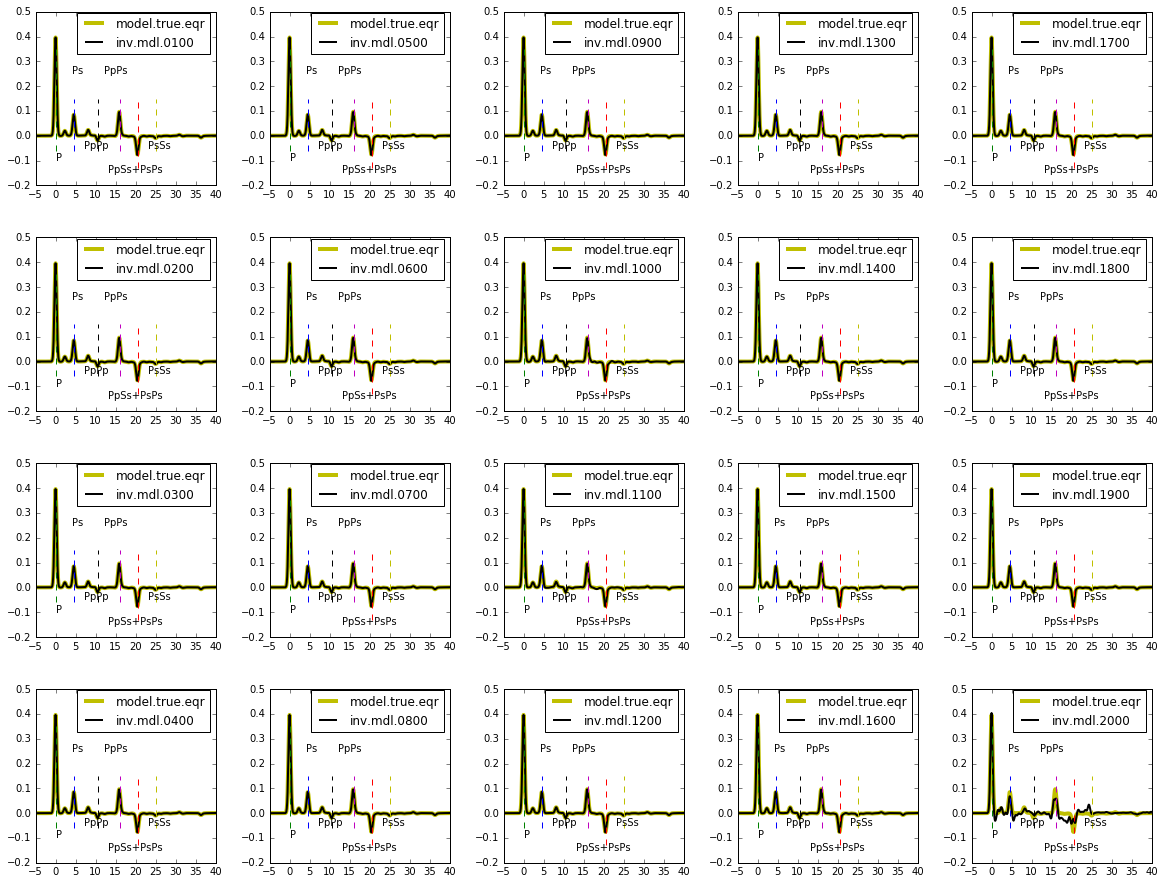

In [32]:
fig = mpl.figure(figsize = (20,80))
gs1 = gridspec.GridSpec(len(vs),len(vs1))
gs1.update(wspace=0.3, hspace=0.3)
for i,j in enumerate(RF_joint_6_data1):
    for h in range(len(RF_joint_6_data1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.plot(RF[0].times()-5,RF[0].data,'y',lw=4,label='model.true.eqr')
        ax1.plot(RF_joint_6_time1[i][h]-5,j[h],'k',lw=2,label=vp_modellabel1[i][h])
        ax1.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
        ax1.text(0, -0.1, 'P')
        ax1.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
        ax1.text(4, 0.25, 'Ps')
        ax1.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
        ax1.text(7, -0.05, 'PpPp')    
        ax1.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
        ax1.text(12, 0.25, 'PpPs')
        ax1.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
        ax1.text(13, -0.15, 'PpSs+PsPs')
        ax1.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
        ax1.text(23, -0.05, 'PsSs')
        ax1.set_xlim(-5,40)
        ax1.set_ylim(-0.2,0.5)
        ax1.legend(bbox_to_anchor=(0.6, 1.0), loc=9, borderaxespad=0.1)
mpl.savefig('RF_joint_1.svg',format='svg',dpi=500)

<h2>Plotando as Curvas de Dispersão das ondas Love e Rayleigh calculadas através da inversão jointsmth</h2>   

<h4>Importando as Funções do Receptor "verdadeiras" e as calculadas pela sexta interação da inversão jointsmth</h4>

In [33]:
for i,j in enumerate(vp_modellabel):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j)
    os.system('sac2xy 2 syn.6ul.disp > syn_6ul.txt')
    os.system('sac2xy 2 syn.6ur.disp > syn_6ur.txt')

<h4>Mudando o diretório de trabalho</h4>   

In [34]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/')

<h4>Importando as Curvas de Dispersão pela sexta interação da inversão jointsmth</h4>

In [35]:
CD_r_cur = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'/syn_6ur.txt')[:,1] for j in vp_modellabel]
CD_l_cur = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'/syn_6ul.txt')[:,1] for j in vp_modellabel]
periodslr = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+j+'/syn_6ul.txt')[:,0] for j in vp_modellabel]

In [36]:
group_love_curves = []
group_ray_periods = []
group_periods = []


group_periods =  ((np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/ulovetrue.txt'))[:,0])
group_love_curves = ((np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/ulovetrue.txt'))[:,1])
group_ray_periods = ((np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/urayltrue.txt'))[:,1])

In [37]:
CD_l_cur1 = [CD_l_cur[i:i+4] for i in range(0, len(CD_l_cur), 4)]
CD_r_cur1 = [CD_r_cur[i:i+4] for i in range(0, len(CD_r_cur), 4)]
periodslr1 = [periodslr[i:i+4] for i in range(0, len(periodslr), 4)]

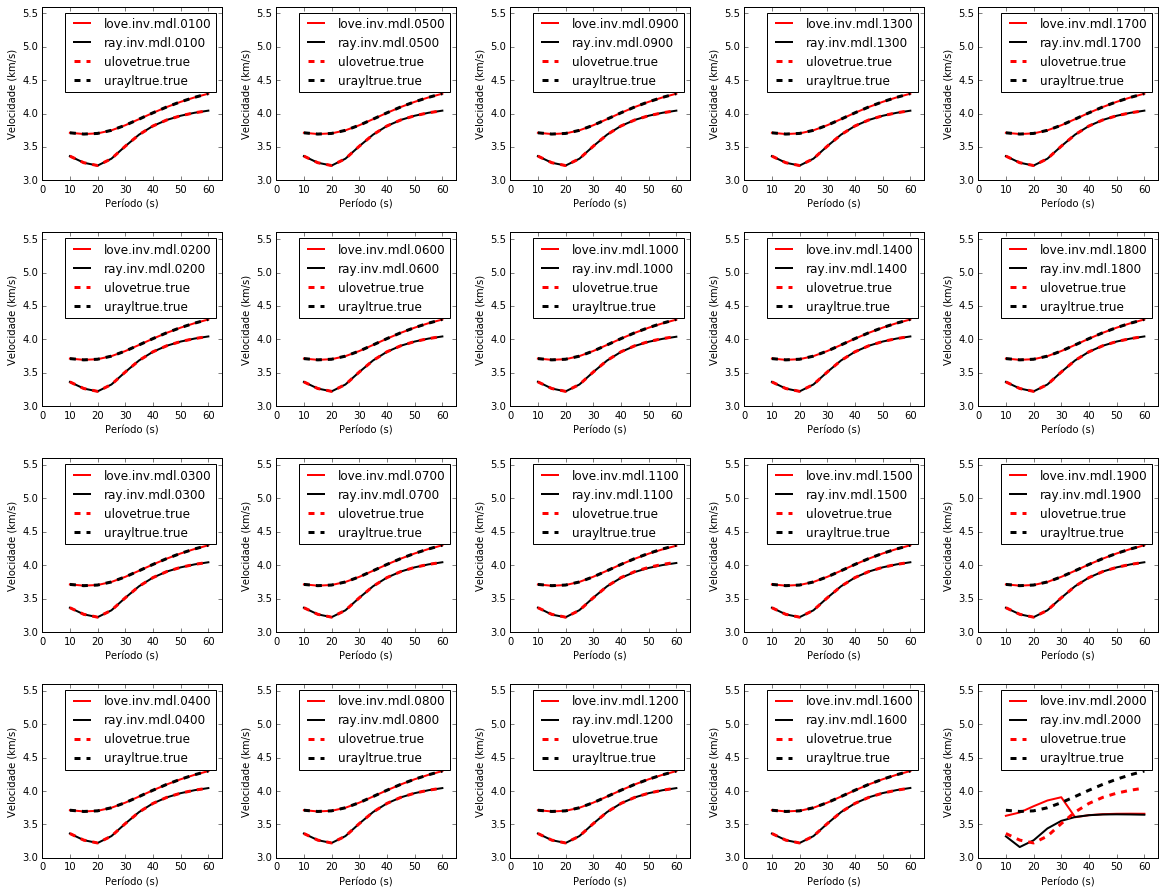

In [38]:
fig = mpl.figure(figsize = (20,80))
gs1 = gridspec.GridSpec(len(vs),len(vs1))
gs1.update(wspace=0.3, hspace=0.3)
for i,j in enumerate(CD_l_cur1):
    for h in range(len(CD_l_cur1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.plot(periodslr1[i][h],j[h],'r',lw=2,label='love.'+vp_modellabel1[i][h])
        ax1.plot(periodslr1[i][h],CD_r_cur1[i][h],'k',lw=2,label='ray.'+vp_modellabel1[i][h])
        ax1.plot(group_periods,group_ray_periods,'--r',lw=3,label='ulovetrue.true')
        ax1.plot(group_periods,group_love_curves,'--k',lw=3,label='urayltrue.true')
        ax1.set_xlabel('Período (s)')
        ax1.set_ylabel('Velocidade (km/s)')   
        ax1.set_xlim(0,65)
        ax1.set_ylim(3,5.6)
        ax1.legend(loc=0)
mpl.savefig('CD_joint_1.svg',format='svg',dpi=500)

<h3 aling='justify'>2. Repetir	   as	   inversões	   simultâneas	   das	   instruções	   usando	   as	   curvas	   de	   dispersão	   para	  períodos	   entre	   30	   e	   60	   s.	   Usar	   um	   parâmetro	   de	   influência	   de	   0.5	   e	   um	   parâmetro	   de	  suavidade	   de	   0.1.	   Fazer	   um	   gráfico	   comparando	   os	   “dados”	   sintéticos	   com	   os	  resultados	  das	  duas	  inversões.	  Discutir	  se	  agora	  a	  inversão	  tem	  problemas	  de
  não‐unicidade.	
  	</h3>  

<h4>Copiando os arquivos do modelo de velocidade para o diretório de trabalho</h4>   

In [ ]:
shutil.copytree('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/2')

<h4>Mudando o diretório de trabalho</h4>   

In [39]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/')

<h5>Calculando as curvas de dispersão  através do programa 'dosrf' para períodos entre 30 e 60 s</h5>

In [40]:
periods = np.arange(30,65,5)
np.savetxt('list',periods,fmt='%0.0f')
os.system('dosrf model.true < list')

0

<h5>Renomeando os arquivos gerados pelo do programa 'dosrf'</h5>

In [41]:
dosrf_name = ['clove', 'ulove', 'crayl', 'urayl']
for i,j in enumerate(dosrf_name):
    os.rename(j+'.sac',j+'.true')

<h5>Plotando as Curvas de Dispersão para o modelo de velocidade verdadeiro</h5>

In [42]:
for i,j in enumerate(dosrf_name):
    os.system('sac2xy 2 '+j+'.true > '+j+'true.txt')

In [43]:
disp_curves = []
periods = []
for i in dosrf_name:
    periods.append((np.genfromtxt(i+'true.txt'))[:,0])
    disp_curves.append((np.genfromtxt(i+'true.txt'))[:,1])

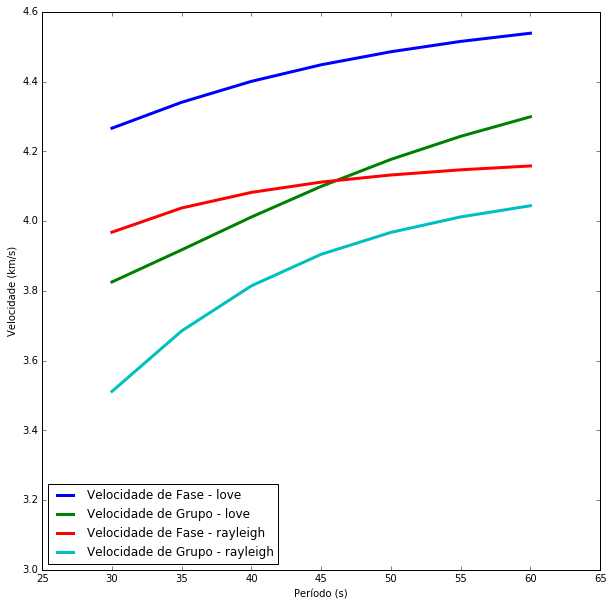

In [44]:
dosrf_label = ['Velocidade de Fase - love', 'Velocidade de Grupo - love', 'Velocidade de Fase - rayleigh', 'Velocidade de Grupo - rayleigh']
mpl.figure(figsize = (10,10))
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(disp_curves):
    ax1 = mpl.subplot(gs1[0])
    ax1.plot(periods[i],j,lw=3,label=dosrf_label[i])
    ax1.set_xlabel('Período (s)')
    ax1.set_ylabel('Velocidade (km/s)')   
    ax1.set_xlim(25,65)
    ax1.set_ylim(3,4.6)
    ax1.legend(loc=0)
mpl.savefig('CD_joint_2.svg',format='svg',dpi=500)

<h4>Copiando as novas curvas de dispersão para cada pasta</h4>

In [ ]:
for i,j in enumerate(vp_modellabel):
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/clove.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/2/'+j+'/clove.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/crayl.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/2/'+j+'/crayl.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/ulove.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/2/'+j+'/ulove.true')
    shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/urayl.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Inversão_Simultânea/2/'+j+'/urayl.true')

<h4>Transformar do  formato  TJO  para  o  formato  JJC  usando  o  aplicativo   tjo2jjc e rodando o  aplicativo de inversão jointsmth em cada pasta</h4>

In [ ]:
for i,j in enumerate(vp_modellabel):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j)
    os.system('rm *.vs')
    os.system('rm *.sac')
    os.system('rm *.txt')
    os.system('rm syn.*')
    os.system('rm model.0 model.1 model.2 model.3 model.4 model.5 model.6')
    os.system('tjo2jjc < model.ini > model.0')
    os.system('jointsmth')

<h3>Transformando as interações na inversão jointsmth para o modelo em .txt para poder plotar os dados</h3>   

In [ ]:
for i,j in enumerate(vp_modellabel):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j)
    os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
    os.system('sac2xy 2 model.1.vs > model_1_vs.txt')
    os.system('sac2xy 2 model.2.vs > model_2_vs.txt')
    os.system('sac2xy 2 model.3.vs > model_3_vs.txt')
    os.system('sac2xy 2 model.4.vs > model_4_vs.txt')
    os.system('sac2xy 2 model.5.vs > model_5_vs.txt')
    os.system('sac2xy 2 model.6.vs > model_6_vs.txt')

<h2>Plotando os modelos calculados através da inversão joinsth</h2>   

<h4>Mudando o diretório de trabalho</h4>   

In [45]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/')

<h4>Importando os arquivos gerados pela inversão jointsmth</h4>

In [46]:
model_joint_2 = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j+'/model_6_vs.txt') for j in vp_modellabel]

<h4>Testando os arquivos gerados pela inversão jointsmth, pois alguns erros estão acontecendo devido ao compilador. Pois isso procuro os arquivos onde os modelos estão apresentando o valor 0 e rodo novamente o programa.</h4>

In [47]:
filtermodel_joint_2 = [l for l,x in enumerate(model_joint_2) if len(x) < 20]

<h4>Arquivos gerados pela inversão jointsmth que precisarão ser reprocessados</h4>

In [48]:
len(filtermodel_joint_2)

0

In [ ]:
reprocess = [vp_modellabel[i] for i in filtermodel_joint_2]

<h4>Reprocessando os arquivos que deram errado com o  aplicativo de inversão jointsmth em cada pasta</h4>

In [ ]:
for i,j in enumerate(reprocess):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j)
    os.system('rm *.vs')
    os.system('rm *.sac')
    os.system('rm *.txt')
    os.system('rm syn.*')
    os.system('rm model.0 model.1 model.2 model.3 model.4 model.5 model.6')
    os.system('tjo2jjc < model.ini > model.0')
    os.system('jointsmth')
    os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
    os.system('sac2xy 2 model.1.vs > model_1_vs.txt')
    os.system('sac2xy 2 model.2.vs > model_2_vs.txt')
    os.system('sac2xy 2 model.3.vs > model_3_vs.txt')
    os.system('sac2xy 2 model.4.vs > model_4_vs.txt')
    os.system('sac2xy 2 model.5.vs > model_5_vs.txt')
    os.system('sac2xy 2 model.6.vs > model_6_vs.txt')

<h4>Importando os arquivos gerados pela inversão jointsmth</h4>

In [49]:
model_joint_2 = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j+'/model_6_vs.txt') for j in vp_modellabel]

In [50]:
vs_2 = []
prof_2 = []
for i,j in enumerate(model_joint_2):
    vs_2.append(j[:,0])
    prof_2.append((-1)*(j[:,1]))

In [51]:
prof1_2 = [prof_2[i:i+4] for i in range(0, len(prof_2), 4)]
vs1_2 = [vs_2[i:i+4] for i in range(0, len(vs_2), 4)]

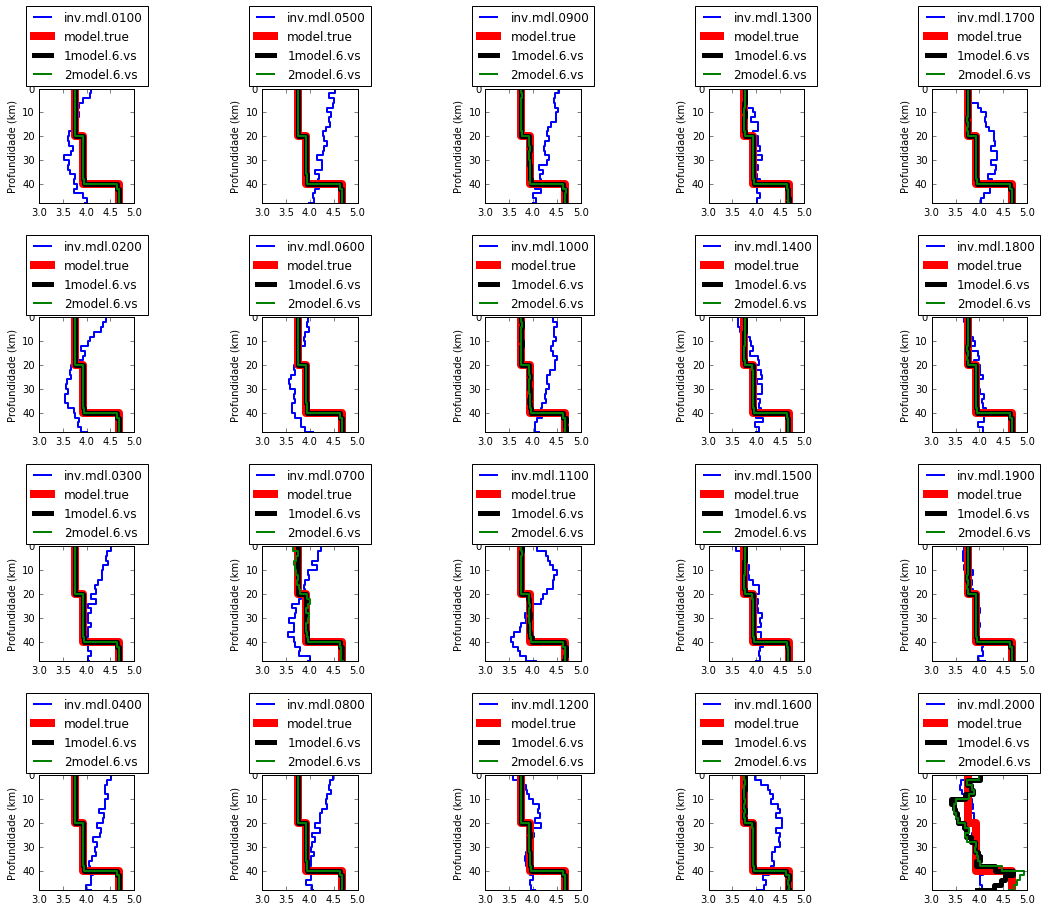

In [52]:
fig = mpl.figure(figsize = (20,80))
gs1 = gridspec.GridSpec(len(vs),len(vs1))
gs1.update(wspace=0, hspace=1)
for i,j in enumerate(vs1):
    for h in range(len(vs1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.step(vs_01[i][h],prof_01[i][h],'b',lw= 2, where='post',label=vp_modellabel1[i][h])
        ax1.step(vs_true,H_true_vs,'r',lw=8,where='post',label='model.true')
        ax1.step(j[h],prof1[i][h],'k',lw=5,where='post',label='1model.6.vs')
        ax1.step(vs1_2[i][h],prof1_2[i][h],'g',lw=2,where='post',label='2model.6.vs')
        ax1.set_ylabel('Profundidade (km)')
        ax1.set_xlim([3,5])
        ax1.set_ylim([48,0])
        ax1.set_aspect(0.05)
        ax1.legend(bbox_to_anchor=(0.5, 1.73), loc=9, borderaxespad=0.1)
mpl.savefig('model_joint_2.svg',format='svg',dpi=500)

<h2>Plotando as Funções do Receptor calculados através da inversão jointsmth</h2>   

<h4>Importando as Funções do Receptor calculadas pela sexta interação da inversão jointsmth</h4>

In [53]:
RF_joint_6_2 = [op.read('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j+'/syn.6.rftn') for j in vp_modellabel]

In [54]:
RF_joint_6_data_2 = []
RF_joint_6_time_2 = []
for i,j in enumerate(RF_joint_6_2):
    a = j[0]
    RF_joint_6_data_2.append(a.data)
    RF_joint_6_time_2.append(a.times())

In [55]:
RF_joint_6_data1_2 = [RF_joint_6_data_2[i:i+4] for i in range(0, len(RF_joint_6_data_2), 4)]
RF_joint_6_time1_2 = [RF_joint_6_time_2[i:i+4] for i in range(0, len(RF_joint_6_time_2), 4)]

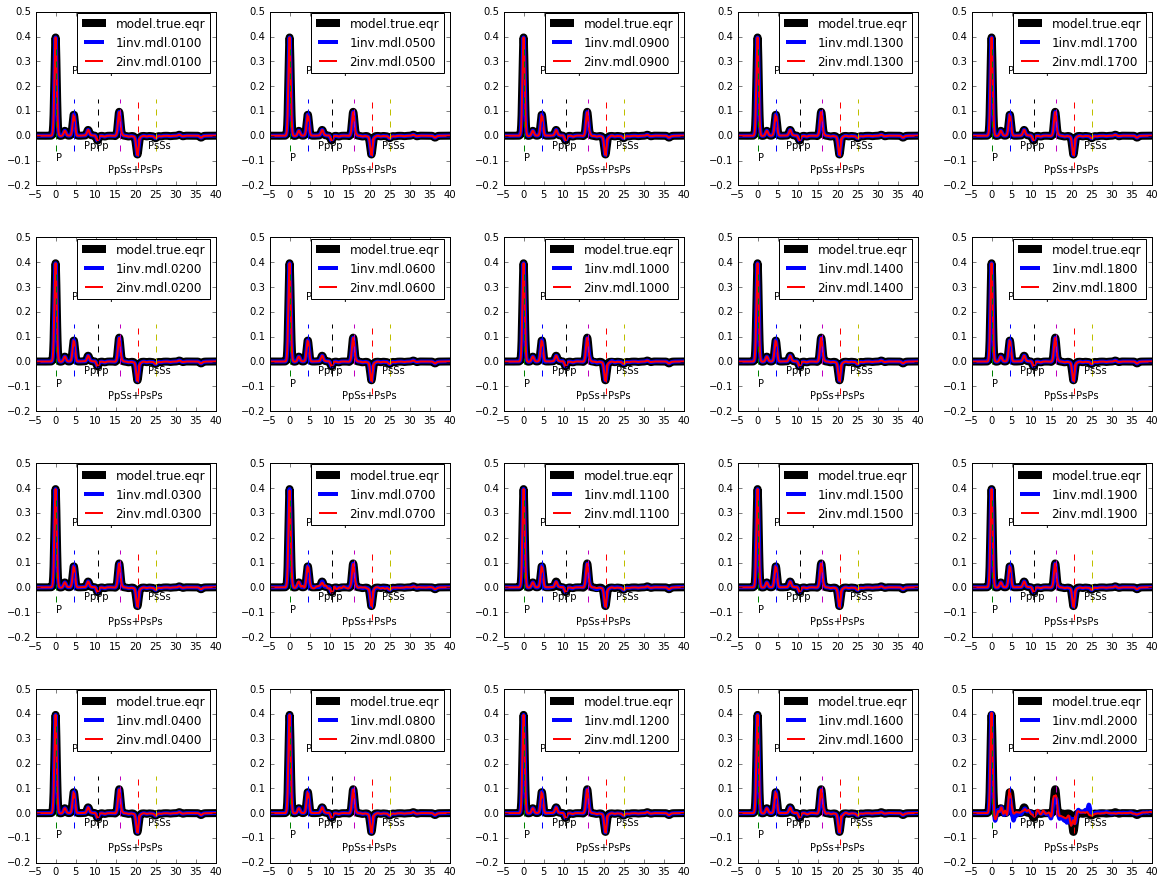

In [56]:
fig = mpl.figure(figsize = (20,80))
gs1 = gridspec.GridSpec(len(vs),len(vs1))
gs1.update(wspace=0.3, hspace=0.3)
for i,j in enumerate(RF_joint_6_data1):
    for h in range(len(RF_joint_6_data1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.plot(RF[0].times()-5,RF[0].data,'k',lw=8,label='model.true.eqr')
        ax1.plot(RF_joint_6_time1[i][h]-5,j[h],'b',lw=4,label='1'+vp_modellabel1[i][h])
        ax1.plot(RF_joint_6_time1_2[i][h]-5,RF_joint_6_data1_2[i][h],'r',lw=2,label='2'+vp_modellabel1[i][h])
        ax1.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
        ax1.text(0, -0.1, 'P')
        ax1.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
        ax1.text(4, 0.25, 'Ps')
        ax1.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
        ax1.text(7, -0.05, 'PpPp')    
        ax1.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
        ax1.text(12, 0.25, 'PpPs')
        ax1.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
        ax1.text(13, -0.15, 'PpSs+PsPs')
        ax1.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
        ax1.text(23, -0.05, 'PsSs')
        ax1.set_xlim(-5,40)
        ax1.set_ylim(-0.2,0.5)
        ax1.legend(bbox_to_anchor=(0.6, 1.0), loc=9, borderaxespad=0.1)
mpl.savefig('RF_joint_2.svg',format='svg',dpi=500)

<h2>Plotando as Curvas de Dispersão das ondas Love e Rayleigh calculadas através da inversão jointsmth</h2>   

<h4>Importando as Funções do Receptor "verdadeiras" e as calculadas pela sexta interação da inversão jointsmth</h4>

In [57]:
for i,j in enumerate(vp_modellabel):
    os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j)
    os.system('sac2xy 2 syn.6ul.disp > syn_6ul.txt')
    os.system('sac2xy 2 syn.6ur.disp > syn_6ur.txt')

<h4>Mudando o diretório de trabalho</h4>   

In [58]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/')

<h4>Importando as Curvas de Dispersão pela sexta interação da inversão jointsmth</h4>

In [59]:
CD_r_cur_2 = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j+'/syn_6ur.txt')[:,1] for j in vp_modellabel]
CD_l_cur_2 = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j+'/syn_6ul.txt')[:,1] for j in vp_modellabel]
periodslr_2 = [np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/2/'+j+'/syn_6ul.txt')[:,0] for j in vp_modellabel]

In [60]:
CD_l_cur1_2 = [CD_l_cur_2[i:i+4] for i in range(0, len(CD_l_cur_2), 4)]
CD_r_cur1_2 = [CD_r_cur_2[i:i+4] for i in range(0, len(CD_r_cur_2), 4)]
periodslr1_2 = [periodslr_2[i:i+4] for i in range(0, len(periodslr_2), 4)]

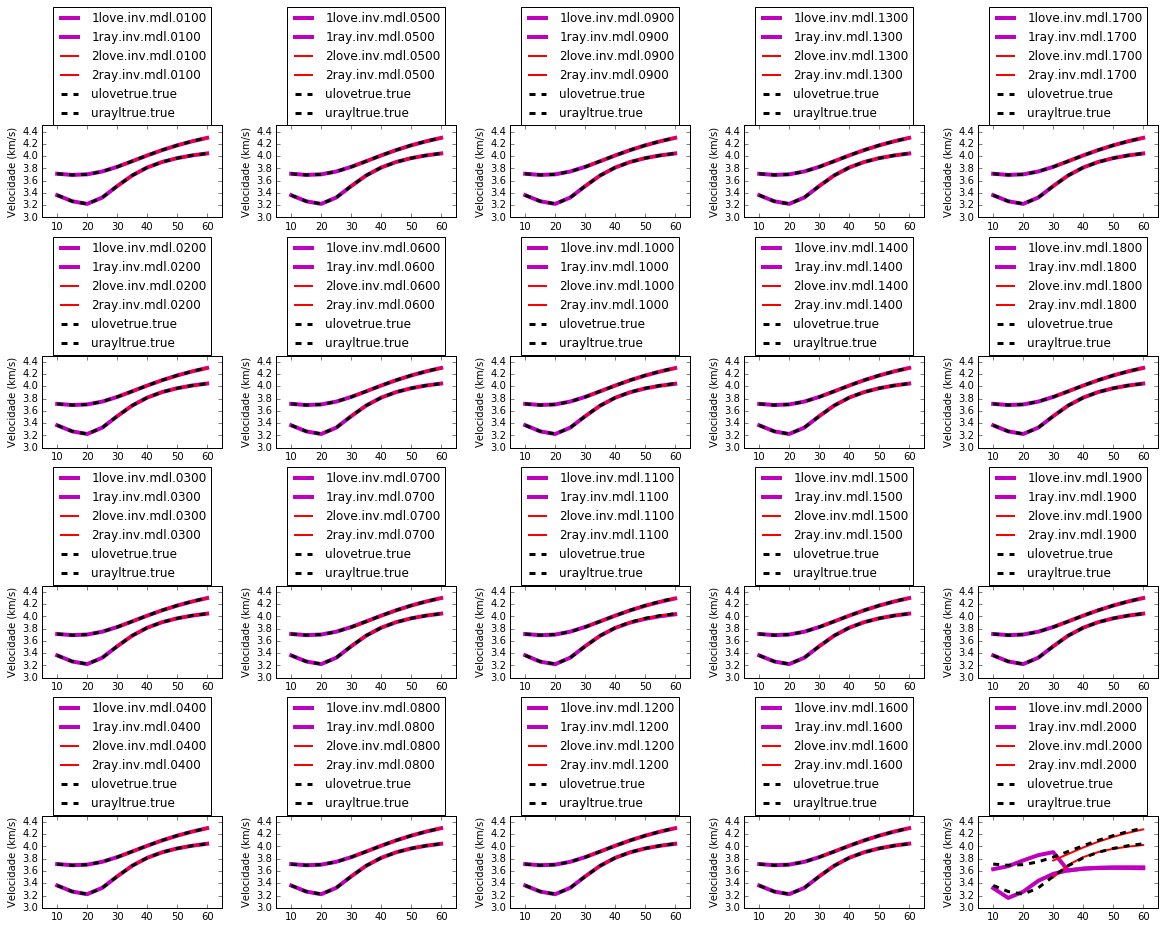

In [61]:
fig = mpl.figure(figsize = (20,80))
gs1 = gridspec.GridSpec(len(vs),len(vs1))
gs1.update(wspace=0.3, hspace=1.5)
for i,j in enumerate(CD_l_cur1):
    for h in range(len(CD_l_cur1[0])):
        ax1 = mpl.subplot(gs1[h,i])
        ax1.plot(periodslr1[i][h],j[h],'m',lw=4,label='1love.'+vp_modellabel1[i][h])
        ax1.plot(periodslr1[i][h],CD_r_cur1[i][h],'m',lw=4,label='1ray.'+vp_modellabel1[i][h])
        ax1.plot(periodslr1_2[i][h],CD_l_cur1_2[i][h],'r',lw=2,label='2love.'+vp_modellabel1[i][h])
        ax1.plot(periodslr1_2[i][h],CD_r_cur1_2[i][h],'r',lw=2,label='2ray.'+vp_modellabel1[i][h])
        ax1.plot(group_periods,group_ray_periods,'--k',lw=3,label='ulovetrue.true')
        ax1.plot(group_periods,group_love_curves,'--k',lw=3,label='urayltrue.true')
        ax1.set_ylabel('Velocidade (km/s)')   
        ax1.set_xlim(5,65)
        ax1.set_ylim(3,4.5)
        ax1.legend(bbox_to_anchor=(0.5, 2.3), loc=9, borderaxespad=0.1)
mpl.savefig('CD_joint_2.svg',format='svg',dpi=500)

<h3 aling='justify'>3. Repetir   a	   inversão	   simultânea	   das	   instruções	   para	   valores	   do	   parâmetro	   de	   influência	  entre	  0.0	  e	  1.0	  a	  intervalos	  de	  0.1.	  Usar	  sempre  um	  parâmetro	  de	  suavidade	  de	  0.1	  e	  o	  modelo	   inicial	   das	   instruções.
   Calcular	   o	   valor	   RMS	   entre	   os	   “dados”	   sintéticos	   (pode	  usar	  o	 comando	  ‘rms’	  do	  SAC)	  e	   as  previsões	  dos	  modelos	  e	  fazer	  um	  gráfico	  do
  RMS	  para	a	  dispersão	  em	  função	  do	  RMS	  para	  as	  funções	  de	  receptor.	  Discutir	  os	  resultados.		  	</h3>  

<h4>Criando o diretório de trabalho</h4>   

In [62]:
os.mkdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3')

In [66]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3')

<h4>Criando as pastas para fazer a inversão de acordo com o parâmetro de influência</h4>   

In [63]:
for k in np.arange(0,1,0.1):
    os.mkdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'+str(k))

<h5>Criando o modelo de velocidade inicial</h5>

In [68]:
model_true = ['5', '1', '1','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 2','7 0','y','model.ini','modelo inicial']
np.savetxt('model_ini.txt',model_true,fmt='%s')
os.system('icmod < model_ini.txt')

0

<h4>Copiando os arquivos para fazer a inversão</h4>   

In [70]:
arquiv_inver = ['model.true.eqr','urayl.true','ulove.true','model.true']
for k in np.arange(0,1,0.1):
        for l in arquiv_inver:
            shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/'+l,'/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'+str(k)+'/'+l)
            shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/model.ini','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'+str(k)+'/model.ini')

<h4>Transformar do  formato  TJO  para  o  formato  JJC  usando  o  aplicativo   tjo2jjc e rodando o  aplicativo de inversão jointsmth em cada pasta</h4>

In [71]:
for k in np.arange(0,1,0.1):
        os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'+str(k))
        obsr = ['1','"model.true.eqr"','0.05','2.5','5.']
        obsd = ['2','"ulove.true"','2.0 5.0 0.05 0.0001 10','"urayl.true"','2.0 5.0 0.05 0.0001 10']
        obsj = ['6',str(k),'0.1','-1.0','-1.0', '55', '0.0']
        np.savetxt('obs.r',obsr,fmt='%s')
        np.savetxt('obs.d',obsd,fmt='%s')
        np.savetxt('obs.j',obsj,fmt='%s')
        os.system('rm *.vs')
        os.system('rm *.sac')
        os.system('rm *.txt')
        os.system('rm syn.*')
        os.system('rm model.0 model.1 model.2 model.3 model.4 model.5 model.6')
        os.system('tjo2jjc < model.ini > model.0')
        os.system('jointsmth')
        os.system('sac2xy 2 model.6.vs > model_6_vs_'+str(k)+'.txt')
        os.system('sac2xy 2 syn.6ul.disp > syn_6ul_'+str(k)+'.txt')
        os.system('sac2xy 2 syn.6ur.disp > syn_6ur_'+str(k)+'.txt')

<h4>Mudando o diretório de trabalho</h4>   

In [101]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/')

<h4>Importando os arquivos gerados pela inversão jointsmth</h4>

In [126]:
model_vs_list = []
for root, dirs, files in os.walk('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'):
    for invfile in files:
        if invfile.startswith('model_6_vs_'):
            model_vs_list.append(os.path.join(root, invfile))
model_vs_listS = sorted(model_vs_list)

In [127]:
model_joint_3 = [np.genfromtxt(j) for j in model_vs_listS]

In [128]:
model_vs_listS_label = [i.split('/model_6_vs_')[0] for i in model_vs_listS]

<h4>Testando os arquivos gerados pela inversão jointsmth, pois alguns erros estão acontecendo devido ao compilador. Pois isso procuro os arquivos onde os modelos estão apresentando o valor 0 e rodo novamente o programa.</h4>

In [129]:
filtermodel_joint_3 = [l for l,x in enumerate(model_joint_3) if len(x) < 20]

<h4>Arquivos gerados pela inversão jointsmth que precisarão ser reprocessados</h4>

In [130]:
len(filtermodel_joint_3)

0

In [123]:
reprocess_3 = [model_vs_listS_label[i] for i in filtermodel_joint_3]

In [124]:
model_vs_listS_index = [i.split('/')[9] for i in reprocess_3]

<h4>Reprocessando o  aplicativo de inversão jointsmth em cada pasta</h4>

In [125]:
for i,j in enumerate(reprocess_3):
    os.chdir(j)
    obsr = ['1','"model.true.eqr"','0.05','2.5','5.']
    obsd = ['2','"ulove.true"','2.0 5.0 0.05 0.0001 10','"urayl.true"','2.0 5.0 0.05 0.0001 10']
    obsj = ['6',model_vs_listS_index[i],'0.1','-1.0','-1.0', '55', '0.0']
    np.savetxt('obs.r',obsr,fmt='%s')
    np.savetxt('obs.d',obsd,fmt='%s')
    np.savetxt('obs.j',obsj,fmt='%s')
    os.system('rm model.0 model.1 model.2 model.3 model.4 model.5 model.6')
    os.system('tjo2jjc < model.ini > model.0')
    os.system('jointsmth')
    os.system('sac2xy 2 model.6.vs > model_6_vs_'+model_vs_listS_index[i]+'.txt')
    os.system('sac2xy 2 syn.6ul.disp > syn_6ul_'+model_vs_listS_index[i]+'.txt')
    os.system('sac2xy 2 syn.6ur.disp > syn_6ur_'+model_vs_listS_index[i]+'.txt')

<h2>Plotando os resultados calculados através da inversão jointsmth</h2>   

<h4>Importando os arquivos gerados pela inversão jointsmth</h4>

In [382]:
model_vs_list_3 = []
RF_list_3 = []
CD_r_cur_3 = []
CD_l_cur_3 = []

for root, dirs, files in os.walk('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'):
    for invfile in files:
        if invfile.startswith('model_6_vs_'):
            model_vs_list_3.append(os.path.join(root, invfile))
        if invfile.startswith('syn.6.'):
            RF_list_3.append(os.path.join(root, invfile))
        if invfile.startswith('syn_6ur_'):
            CD_r_cur_3.append(os.path.join(root, invfile))
        if invfile.startswith('syn_6ul_'):
            CD_l_cur_3.append(os.path.join(root, invfile))
            
model_vs_list_3S = sorted(model_vs_list_3)
RF_list_3S = sorted(RF_list_3)
CD_r_cur_3S = sorted(CD_r_cur_3)
CD_l_cur_3S = sorted(CD_l_cur_3)

<h6>Importando os modelos de velocidade gerados pela inversão jointsmth</h6>

In [383]:
model_vs_jointsmth_3 = [np.genfromtxt(i) for i in model_vs_list_3S]
model_vs_jointsmthlabel_3 = [i.split('/')[9] for i in model_vs_list_3S]

In [384]:
vs_3 = []
prof_3 = []
for i,j in enumerate(model_vs_jointsmth_3):
    vs_3.append(j[:,0])
    prof_3.append((-1)*(j[:,1]))

<h6>Importando as Funções do Receptor geradas pela inversão jointsmth</h6>

In [385]:
RF_joint_3 = []
RF_joint_3 = [op.read(j) for j in RF_list_3S]

In [386]:
RF_joint_6_data_3 = []
RF_joint_6_time_3 = []
for i,j in enumerate(RF_joint_3):
    a = j[0]
    RF_joint_6_data_3.append(a.data)
    RF_joint_6_time_3.append(a.times())

<h6>Importando as Curvas de Dispersão geradas pela inversão jointsmth</h6>

In [387]:
CD_r_cur_3 = [np.genfromtxt(j)[:,1] for j in CD_r_cur_3S]
CD_l_cur_3 = [np.genfromtxt(j)[:,1] for j in CD_l_cur_3S]
periodsr_3 = [np.genfromtxt(j)[:,0] for j in CD_r_cur_3S]
periodsl_3 = [np.genfromtxt(j)[:,0] for j in CD_l_cur_3S]

<h6>Dividindo a Figura em duas partes</h6>

In [393]:
vs_3_1 = vs_3[:5]
prof_3_1 = prof_3[:5]
RF_joint_6_data_3_1 = RF_joint_6_data_3[:5]
RF_joint_6_time_3_1 = RF_joint_6_time_3[:5]
CD_r_cur_3_1 = CD_r_cur_3[:4]
CD_l_cur_3_1 = CD_l_cur_3[:4]
periodsr_3_1 = periodsr_3[:4]
periodsl_3_1 = periodsl_3[:4]
model_vs_jointsmthlabel_3_1 = model_vs_jointsmthlabel_3[:5]

vs_3_2 = vs_3[5:]
prof_3_2 = prof_3[5:]
RF_joint_6_data_3_2 = RF_joint_6_data_3[5:]
RF_joint_6_time_3_2 = RF_joint_6_time_3[5:]
CD_r_cur_3_2 = CD_r_cur_3[4:]
CD_l_cur_3_2 = CD_l_cur_3[4:]
periodsr_3_2 = periodsr_3[4:]
periodsl_3_2 = periodsl_3[4:]
model_vs_jointsmthlabel_3_2 = model_vs_jointsmthlabel_3[5:]

<h6>Gerando os gráficos </h6>

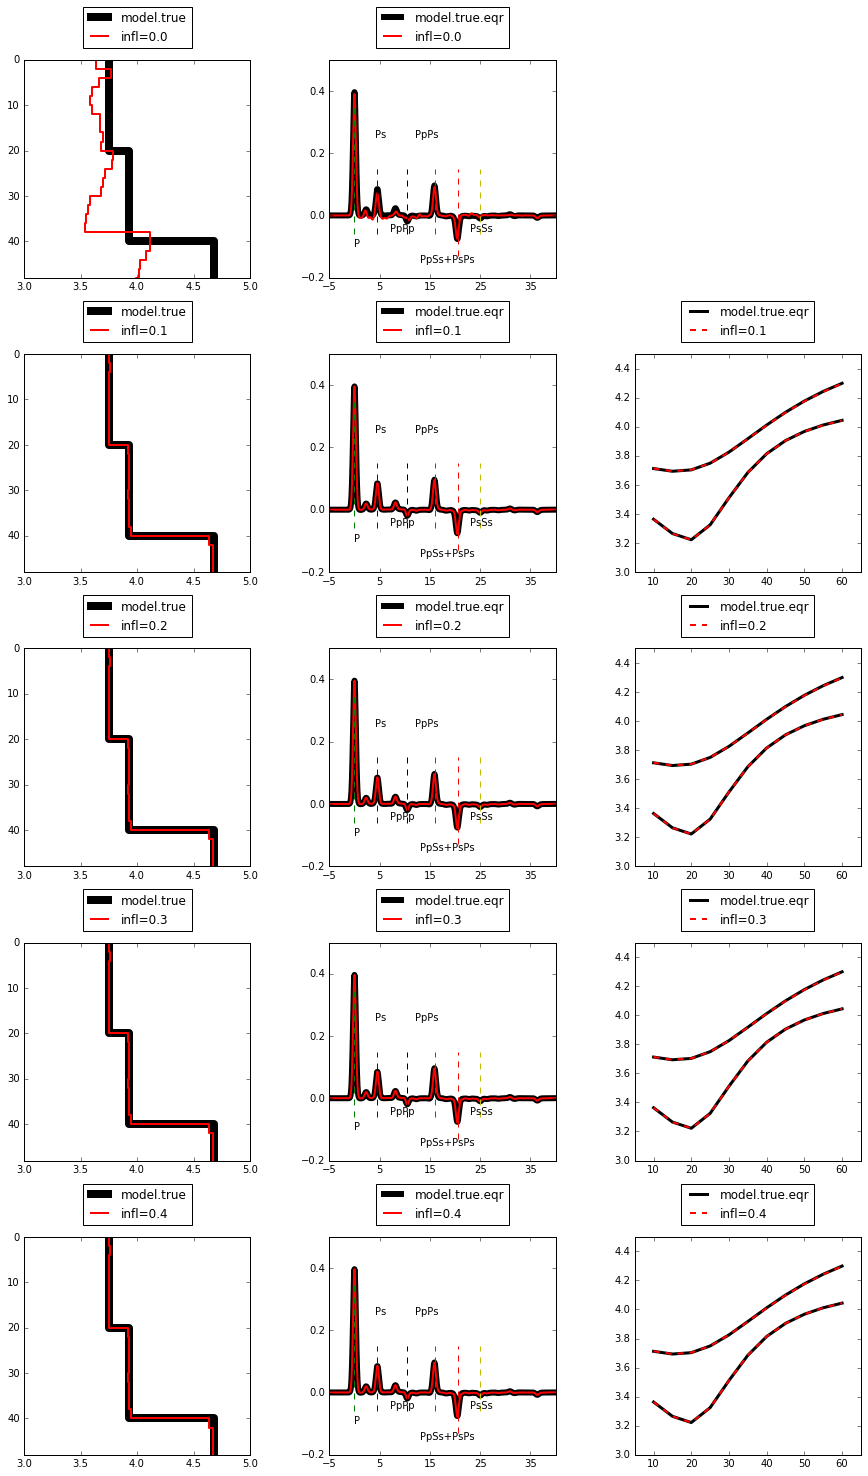

In [620]:
fig = mpl.figure(figsize = (15,25))
gs1 = gridspec.GridSpec(5,3)
gs1.update(wspace=0.35, hspace=0.35)

for i,j in enumerate(vs_3_1):
            ax1 = mpl.subplot(gs1[i,0])
            ax1.step(vs_true,H_true_vs,'k',lw=8,where='post',label='model.true')
            ax1.step(j,prof_3_1[i],'r',lw=2,where='post',label='infl='+model_vs_jointsmthlabel_3_1[i])
            ax1.set_xlim([3,5])
            ax1.set_ylim([48,0])
            ax1.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
            
            
for i,j in enumerate(RF_joint_6_data_3_1):
        ax2 = mpl.subplot(gs1[i,1])    
        ax2.plot(RF[0].times()-5,RF[0].data,'k',lw=6,label='model.true.eqr')
        ax2.plot(RF_joint_6_time_3_1[i]-5,j,'r',lw=2,label='infl='+model_vs_jointsmthlabel_3_1[i])
        ax2.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
        ax2.text(0, -0.1, 'P')
        ax2.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
        ax2.text(4, 0.25, 'Ps')
        ax2.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
        ax2.text(7, -0.05, 'PpPp')    
        ax2.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
        ax2.text(12, 0.25, 'PpPs')
        ax2.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
        ax2.text(13, -0.15, 'PpSs+PsPs')
        ax2.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
        ax2.text(23, -0.05, 'PsSs')
        ax2.set_xlim(-5,40)
        ax2.set_ylim(-0.2,0.5)
        ax2.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
        start, end = ax2.get_xlim()
        ax2.xaxis.set_ticks(np.arange(start, end, 10))
        start1, end1 = ax2.get_ylim()
        ax2.yaxis.set_ticks(np.arange(start1, end1, 0.2))
        

for i,j in enumerate(CD_l_cur_3_1):
        ax3 = mpl.subplot(gs1[i+1,2])
        ax3.plot(group_periods,group_ray_periods,'k',lw=3,label='model.true.eqr')
        ax3.plot(group_periods,group_love_curves,'k',lw=3)
        ax3.plot(periodsr_3_1[i],CD_r_cur_3_1[i],'--r',lw=2,label='infl='+model_vs_jointsmthlabel_3_1[i+1])
        ax3.plot(periodsl_3_1[i],CD_l_cur_3_1[i],'--r',lw=2)
        ax3.set_xlim(5,65)
        ax3.set_ylim(3,4.5)
        ax3.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)

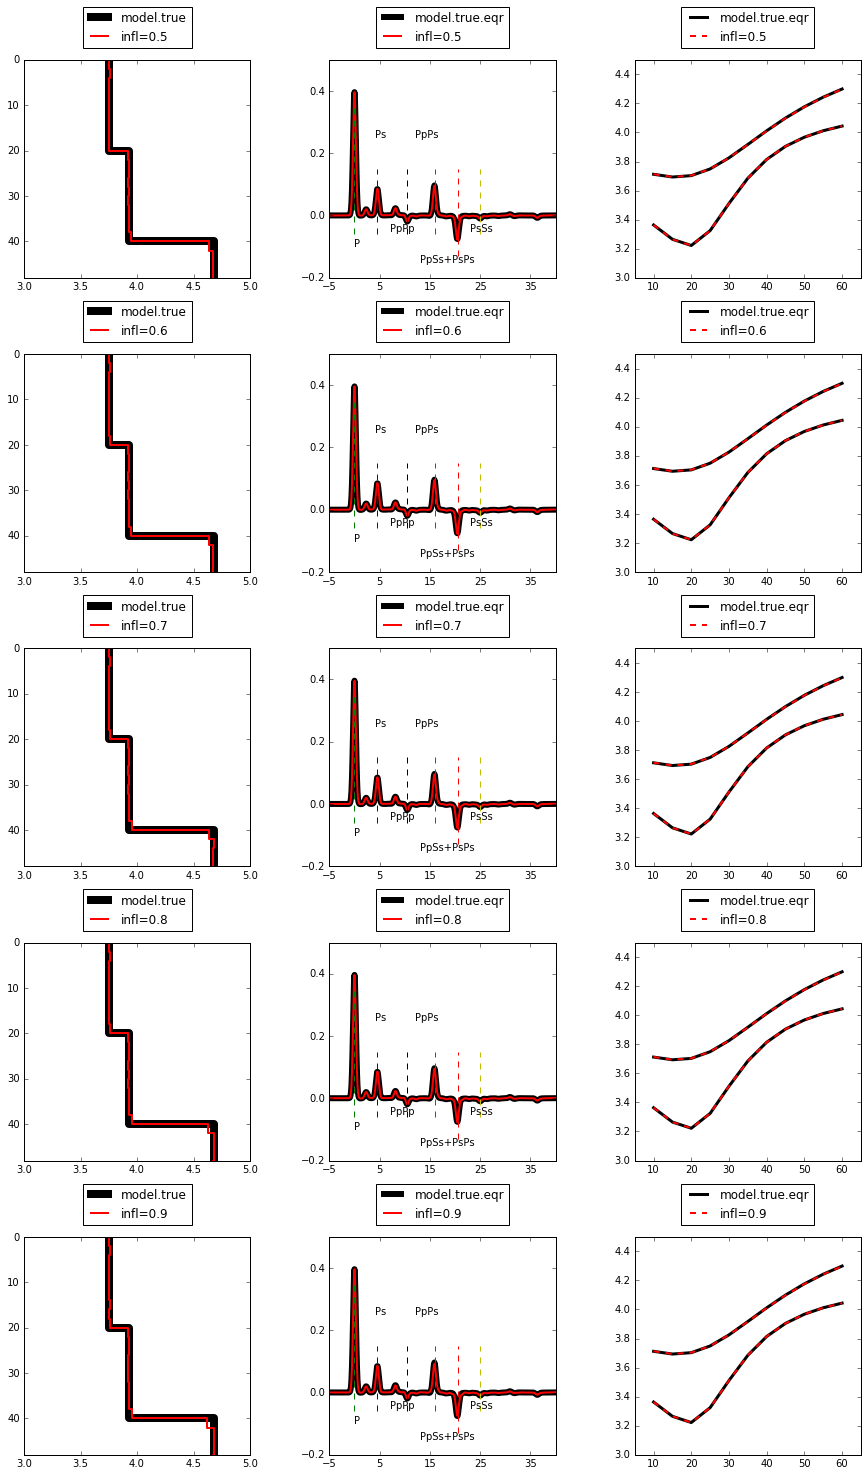

In [619]:
fig = mpl.figure(figsize = (15,25))
gs1 = gridspec.GridSpec(5,3)
gs1.update(wspace=0.35, hspace=0.35)

for i,j in enumerate(vs_3_2):
            ax1 = mpl.subplot(gs1[i,0])
            ax1.step(vs_true,H_true_vs,'k',lw=8,where='post',label='model.true')
            ax1.step(j,prof_3_2[i],'r',lw=2,where='post',label='infl='+model_vs_jointsmthlabel_3_2[i])
            ax1.set_xlim([3,5])
            ax1.set_ylim([48,0])
            ax1.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
            
            
for i,j in enumerate(RF_joint_6_data_3_2):
        ax2 = mpl.subplot(gs1[i,1])    
        ax2.plot(RF[0].times()-5,RF[0].data,'k',lw=6,label='model.true.eqr')
        ax2.plot(RF_joint_6_time_3_2[i]-5,j,'r',lw=2,label='infl='+model_vs_jointsmthlabel_3_2[i])
        ax2.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
        ax2.text(0, -0.1, 'P')
        ax2.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
        ax2.text(4, 0.25, 'Ps')
        ax2.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
        ax2.text(7, -0.05, 'PpPp')    
        ax2.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
        ax2.text(12, 0.25, 'PpPs')
        ax2.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
        ax2.text(13, -0.15, 'PpSs+PsPs')
        ax2.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
        ax2.text(23, -0.05, 'PsSs')
        ax2.set_xlim(-5,40)
        ax2.set_ylim(-0.2,0.5)
        ax2.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
        start, end = ax2.get_xlim()
        ax2.xaxis.set_ticks(np.arange(start, end, 10))
        start1, end1 = ax2.get_ylim()
        ax2.yaxis.set_ticks(np.arange(start1, end1, 0.2))
        

for i,j in enumerate(CD_l_cur_3_2):
        ax3 = mpl.subplot(gs1[i,2])
        ax3.plot(group_periods,group_ray_periods,'k',lw=3,label='model.true.eqr')
        ax3.plot(group_periods,group_love_curves,'k',lw=3)
        ax3.plot(periodsr_3_2[i],CD_r_cur_3_2[i],'--r',lw=2,label='infl='+model_vs_jointsmthlabel_3_2[i])
        ax3.plot(periodsl_3_2[i],CD_l_cur_3_2[i],'--r',lw=2)
        ax3.set_xlim(5,65)
        ax3.set_ylim(3,4.5)
        ax3.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)

<h2 align="center">Calculando a RMS entre as Funções do Receptor e Curvas de Dispersão geradas pela inversão jointsmth e pelos dados observados</h2>

In [672]:
def rootMeanSquare(Pred,Obs):

    err = Obs - Pred

    squareError = np.power(err,2)

    meanSquareError = np.mean(squareError) 

    rootMeanSquareError = np.sqrt(meanSquareError)

    return rootMeanSquareError

<h5>RMS entre as Funções do Receptor preditas e os dados observados</h5>

In [673]:
RF_RMS = []
for k,l in enumerate(RF_joint_6_data_3):
    RF_RMS.append(rootMeanSquare(l,RF[0].data))

<h5>RMS entre as Curvas de Dispersão preditas e os dados observados</h5>

In [674]:
CD_r_RMS = []
CD_l_RMS = []

for k,l in enumerate(CD_r_cur_3):
    CD_r_RMS.append(rootMeanSquare(CD_r_cur_3[k],group_ray_periods))
    CD_l_RMS.append(rootMeanSquare(CD_l_cur_3[k],group_love_curves))

<h5>Gráfico	  do	  RMS	  para a	Curva de Dispersão da onda Rayleigh	  em	  função	  do	  RMS	  das	  Funções	  de	  Receptor</h5>

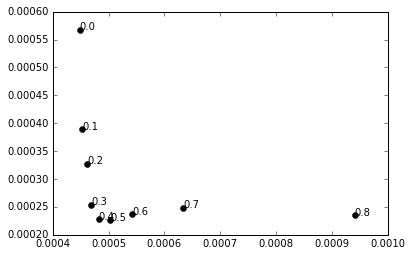

In [675]:
for i,j in enumerate(RF_RMS[1:]):
    mpl.plot(j,CD_r_RMS[i],'ok')
    mpl.text(j,CD_r_RMS[i],model_vs_jointsmthlabel_3[i])

<h5>Gráfico	  do	  RMS	  para a	Curva de Dispersão da onda Love	  em	  função	  do	  RMS	  das	  Funções	  de	  Receptor</h5>

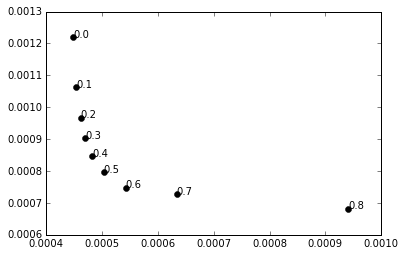

In [676]:
for i,j in enumerate(RF_RMS[1:]):
    mpl.plot(j,CD_l_RMS[i],'ok')
    mpl.text(j,CD_l_RMS[i],model_vs_jointsmthlabel_3[i])

<h3 aling='justify'>4. Mudar   o	  modelo	  das	  instruções	  para	  uma	  crosta	  superior	  de
  6.2	  km/s	  e	  calcule	a	  função	  de	   receptor	   sintética.	   Realizar	   a	   inversão	   simultânea	   com	   as	   curvas	   de	   dispersão	   do	  modelo	  original	  (com	  uma	  crosta	  superior	  de	  6.5	  km/s)	  para	  valores	  do	  parâmetro	  de	  influência	  entre	  0.1	  e	  0.9	  a	  intervalos	  de	  0.1.	  Usar	  um	  parâmetro	  de	  suavidade	  de
  0.1	  e	  o	  modelo	  inicial	  das	  instruções.	  Discutir	  os	  resultados.	   	
  	  	</h3>  

<h4>Criando o diretório de trabalho</h4>   

In [ ]:
os.mkdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4')

<h4>Criando as pastas para fazer a inversão de acordo com o parâmetro de influência</h4>   

In [411]:
for k in np.arange(0.1,1.0,0.1):
    os.mkdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'+str(k))

<h4>Mudando o diretório de trabalho</h4>   

In [568]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/')

<h5>Criando o modelo de velocidade</h5>

In [546]:
model_true_4 = ['5', '1', '1','6.2 20','6.8 20','8.1 0','y','model.true_4','modelo verdadeiro']
np.savetxt('model_true.txt',model_true_4,fmt='%s')
os.system('icmod < model_true.txt')

0

<h4>Calculando o modelo de velocidade para onda P,S e rho com o aplicativo VPLOT</h4>

In [547]:
vplot_true_4 = ['model.true_4', 'y']
np.savetxt('vplot_true.txt',vplot_true_4,fmt='%s')
os.system('vplot < vplot_true.txt')
os.system('sac2xy 2 model.true_4.vs > model_true_vs_4.txt')
os.system('sac2xy 2 model.true_4.vp > model_true_vp_4.txt')
os.system('sac2xy 2 model.true_4.rho > model_true_rho_4.txt')

0

<h5>Plotando o modelo de velocidade verdadeiro</h5>

In [548]:
model_true_vp_4 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/model_true_vp_4.txt')
model_true_vs_4 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/model_true_vs_4.txt')
model_true_rho_4 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/model_true_rho_4.txt')

In [549]:
vp_true_4 = model_true_vp_4[:,0]
H_true_vp_4 = (-1)*model_true_vp_4[:,1]
vs_true_4 = model_true_vs_4[:,0]
H_true_vs_4 = (-1)*model_true_vs_4[:,1]
rho_true_4 = model_true_rho_4[:,0]
H_true_rhos_4 = (-1)*model_true_rho_4[:,1]

model_vpvsrho_4 = [vp_true_4,vs_true_4,rho_true_4]
model_Hvpvsrho_4 = [H_true_vp_4,H_true_vs_4,H_true_rhos_4]
model_label_4 = ['model.true.vp_4','model.true.vs_4','model.true.rho_4']
model_xlabel_4 = ['Velocidade - P (km/s)','Velocidade - S (km/s)', 'Densidade (kg/m³)']

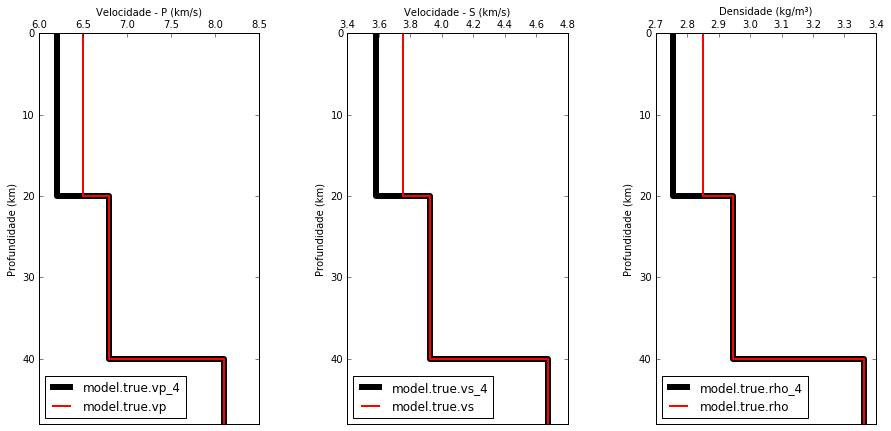

In [580]:
mpl.figure(figsize = (15,7))
gs1 = gridspec.GridSpec(1,3)
gs1.update(wspace=0.4, hspace=0.4)
for i,j in enumerate(model_vpvsrho_4):
    ax1 = mpl.subplot(gs1[i])
    ax1.step(j,model_Hvpvsrho_4[i],'k',lw = 6,where='post',label=model_label_4[i])
    ax1.step(model_vpvsrho[i],model_Hvpvsrho[i],'r',lw = 2,where='post',label=model_label[i])
    ax1.set_xlabel(model_xlabel_4[i])
    ax1.set_ylabel('Profundidade (km)')
    ax1.xaxis.tick_top()
    ax1.set_ylim([48,0])
    ax1.xaxis.set_label_position('top') 
    ax1.legend(loc=3)

<h5>Calculando a Função do Receptor para o modelo de velocidade acima</h5>

<h6>Programa respknt</h6>

In [558]:
respknt_true_4 = ['model.true_4', 'y','1','0.1','45','0.05','f','y']
np.savetxt('respknt_true.txt',respknt_true_4,fmt='%s')
os.system('respknt < respknt_true.txt')

0

<h6>Programa pwaveqn</h6>

In [559]:
pwaveqn_true_4 = ['model.true_4', 'n','n','model.true_4','0','2.5','5','n']
np.savetxt('pwaveqn_true.txt',pwaveqn_true_4,fmt='%s')
os.system('pwaveqn < pwaveqn_true.txt')

0

<h5>Plotando a Função do Receptor para o modelo de velocidade verdadeiro</h5>

In [578]:
RF_4 = op.read('model.true_4.eqr')

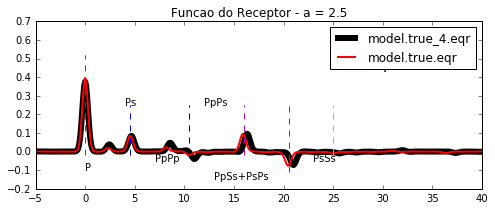

In [579]:
mpl.figure(figsize = (8,3))
ax1 = mpl.subplot()
ax1.plot(RF_4[0].times()-5,RF_4[0].data,'k',lw=6,label='model.true_4.eqr')
ax1.plot(RF[0].times()-5,RF[0].data,'r',lw=2,label='model.true.eqr')
ax1.set_title('Funcao do Receptor - a = 2.5')
ax1.text(30,0.45,'p = 0.05',fontsize=15)
ax1.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
ax1.text(0, -0.1, 'P')
ax1.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
ax1.text(4, 0.25, 'Ps')
ax1.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
ax1.text(7, -0.05, 'PpPp')    
ax1.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
ax1.text(12, 0.25, 'PpPs')
ax1.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
ax1.text(13, -0.15, 'PpSs+PsPs')
ax1.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
ax1.text(23, -0.05, 'PsSs')
ax1.set_xlim(-5,40)
ax1.set_ylim(-0.2,0.7)
ax1.legend(loc=0)

<h4>Copiando as novas curvas de dispersão para cada pasta</h4>

In [428]:
shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/clove.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/clove.true')
shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/crayl.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/crayl.true')
shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/ulove.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/ulove.true')
shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/1/urayl.true','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/urayl.true')

'/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/urayl.true'

<h4>Copiando os arquivos para fazer a inversão</h4>   

In [429]:
arquiv_inver = ['model.true.eqr','urayl.true','ulove.true','model.true']
for l in arquiv_inver:
    for k in np.arange(0.1,1.0,0.1):
            shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/3/'+str(k)+'/model.ini','/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'+str(k)+'/model.ini')
            shutil.copy2('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'+l,'/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'+str(k)+'/'+l)

<h4>Transformar do  formato  TJO  para  o  formato  JJC  usando  o  aplicativo   tjo2jjc e rodando o  aplicativo de inversão jointsmth em cada pasta</h4>

In [430]:
for k in np.arange(0.1,1.0,0.1):
        os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'+str(k))
        obsr = ['1','"model.true.eqr"','0.05','2.5','5.']
        obsd = ['2','"ulove.true"','2.0 5.0 0.05 0.0001 10','"urayl.true"','2.0 5.0 0.05 0.0001 10']
        obsj = ['6',str(k),'0.1','-1.0','-1.0', '55', '0.0']
        np.savetxt('obs.r',obsr,fmt='%s')
        np.savetxt('obs.d',obsd,fmt='%s')
        np.savetxt('obs.j',obsj,fmt='%s')
        os.system('rm *.vs')
        os.system('rm *.sac')
        os.system('rm *.txt')
        os.system('rm syn.*')
        os.system('rm model.0 model.1 model.2 model.3 model.4 model.5 model.6')
        os.system('tjo2jjc < model.ini > model.0')
        os.system('jointsmth')
        os.system('sac2xy 2 model.6.vs > model_6_vs_'+str(k)+'.txt')
        os.system('sac2xy 2 syn.6ul.disp > syn_6ul_'+str(k)+'.txt')
        os.system('sac2xy 2 syn.6ur.disp > syn_6ur_'+str(k)+'.txt')

<h4>Mudando o diretório de trabalho</h4>   

In [477]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/')

<h4>Importando os arquivos gerados pela inversão jointsmth</h4>

In [478]:
model_vs_list_4 = []
for root, dirs, files in os.walk('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'):
    for invfile in files:
        if invfile.startswith('model_6_vs_'):
            model_vs_list_4.append(os.path.join(root, invfile))
model_vs_list_4S = sorted(model_vs_list_4)

In [479]:
model_joint_4 = [np.genfromtxt(j) for j in model_vs_list_4S]

In [480]:
model_vs_list_4S_label = [i.split('/model_6_vs_')[0] for i in model_vs_list_4S]

<h4>Testando os arquivos gerados pela inversão jointsmth, pois alguns erros estão acontecendo devido ao compilador. Pois isso procuro os arquivos onde os modelos estão apresentando o valor 0 e rodo novamente o programa.</h4>

In [481]:
filtermodel_joint_4 = [l for l,x in enumerate(model_joint_4) if len(x) < 20]

<h4>Arquivos gerados pela inversão jointsmth que precisarão ser reprocessados</h4>

In [482]:
len(filtermodel_joint_4)

1

In [483]:
reprocess_4 = [model_vs_list_4S_label[i] for i in filtermodel_joint_4]

In [484]:
model_vs_list_4S_index = [i.split('/')[9] for i in reprocess_4]

<h4>Reprocessando o  aplicativo de inversão jointsmth em cada pasta</h4>

In [485]:
for i,j in enumerate(reprocess_4):
    os.chdir(j)
    obsr = ['1','"model.true.eqr"','0.05','2.5','5.']
    obsd = ['2','"ulove.true"','2.0 5.0 0.05 0.0001 10','"urayl.true"','2.0 5.0 0.05 0.0001 10']
    obsj = ['6',model_vs_list_4S_index[i],'0.1','-1.0','-1.0', '55', '0.0']
    np.savetxt('obs.r',obsr,fmt='%s')
    np.savetxt('obs.d',obsd,fmt='%s')
    np.savetxt('obs.j',obsj,fmt='%s')
    os.system('rm model.0 model.1 model.2 model.3 model.4 model.5 model.6')
    os.system('tjo2jjc < model.ini > model.0')
    os.system('jointsmth')
    os.system('sac2xy 2 model.6.vs > model_6_vs_'+model_vs_list_4S_index[i]+'.txt')
    os.system('sac2xy 2 syn.6ul.disp > syn_6ul_'+model_vs_list_4S_index[i]+'.txt')
    os.system('sac2xy 2 syn.6ur.disp > syn_6ur_'+model_vs_list_4S_index[i]+'.txt')

In [604]:
for k in np.arange(0.1,1.0,0.1):
        os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'+str(k))
        os.system('sac2xy 2 model.6.vs > model_6_vs_'+str(k)+'.txt')
        os.system('sac2xy 2 syn.6ul.disp > syn_6ul_'+str(k)+'.txt')
        os.system('sac2xy 2 syn.6ur.disp > syn_6ur_'+str(k)+'.txt')

<h4>Mudando o diretório de trabalho</h4>   

In [605]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/')

<h2>Plotando os resultados calculados através da inversão jointsmth</h2>   

<h4>Importando os arquivos gerados pela inversão jointsmth</h4>

In [677]:
model_vs_list_4 = []
RF_list_4 = []
CD_r_cur_4 = []
CD_l_cur_4 = []

for root, dirs, files in os.walk('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/6_Inversão_Simultânea/4/'):
    for invfile in files:
        if invfile.startswith('model_6_vs_'):
            model_vs_list_4.append(os.path.join(root, invfile))
        if invfile.startswith('syn.6.'):
            RF_list_4.append(os.path.join(root, invfile))
        if invfile.startswith('syn_6ur_'):
            CD_r_cur_4.append(os.path.join(root, invfile))
        if invfile.startswith('syn_6ul_'):
            CD_l_cur_4.append(os.path.join(root, invfile))
            
model_vs_list_4S = sorted(model_vs_list_4)
RF_list_4S = sorted(RF_list_4)
CD_r_cur_4S = sorted(CD_r_cur_4)
CD_l_cur_4S = sorted(CD_l_cur_4)

<h6>Importando os modelos de velocidade gerados pela inversão jointsmth</h6>

In [678]:
model_vs_jointsmth_4 = [np.genfromtxt(i) for i in model_vs_list_4S]
model_vs_jointsmthlabel_4 = [i.split('/')[9] for i in model_vs_list_4S]

In [679]:
vs_4 = []
prof_4 = []
for i,j in enumerate(model_vs_jointsmth_4):
    vs_4.append(j[:,0])
    prof_4.append((-1)*(j[:,1]))

<h6>Importando as Funções do Receptor geradas pela inversão jointsmth</h6>

In [680]:
RF_joint_4 = []
RF_joint_4 = [op.read(j) for j in RF_list_4S]

In [681]:
RF_joint_6_data_4 = []
RF_joint_6_time_4 = []
for i,j in enumerate(RF_joint_4):
    a = j[0]
    RF_joint_6_data_4.append(a.data)
    RF_joint_6_time_4.append(a.times())

<h6>Importando as Curvas de Dispersão geradas pela inversão jointsmth</h6>

In [682]:
CD_r_cur_4 = [np.genfromtxt(j)[:,1] for j in CD_r_cur_4S]
CD_l_cur_4 = [np.genfromtxt(j)[:,1] for j in CD_l_cur_4S]
periodsr_4 = [np.genfromtxt(j)[:,0] for j in CD_r_cur_4S]
periodsl_4 = [np.genfromtxt(j)[:,0] for j in CD_l_cur_4S]

<h6>Dividindo a Figura em duas partes</h6>

In [683]:
vs_4_1 = vs_4[:5]
prof_4_1 = prof_4[:5]
RF_joint_6_data_4_1 = RF_joint_6_data_4[:5]
RF_joint_6_time_4_1 = RF_joint_6_time_4[:5]
CD_r_cur_4_1 = CD_r_cur_4[:5]
CD_l_cur_4_1 = CD_l_cur_4[:5]
periodsr_4_1 = periodsr_4[:5]
periodsl_4_1 = periodsl_4[:5]
model_vs_jointsmthlabel_4_1 = model_vs_jointsmthlabel_4[:5]

vs_4_2 = vs_4[5:]
prof_4_2 = prof_4[5:]
RF_joint_6_data_4_2 = RF_joint_6_data_4[5:]
RF_joint_6_time_4_2 = RF_joint_6_time_4[5:]
CD_r_cur_4_2 = CD_r_cur_4[5:]
CD_l_cur_4_2 = CD_l_cur_4[5:]
periodsr_4_2 = periodsr_4[5:]
periodsl_4_2 = periodsl_4[5:]
model_vs_jointsmthlabel_4_2 = model_vs_jointsmthlabel_4[5:]

<h6>Gerando os gráficos </h6>

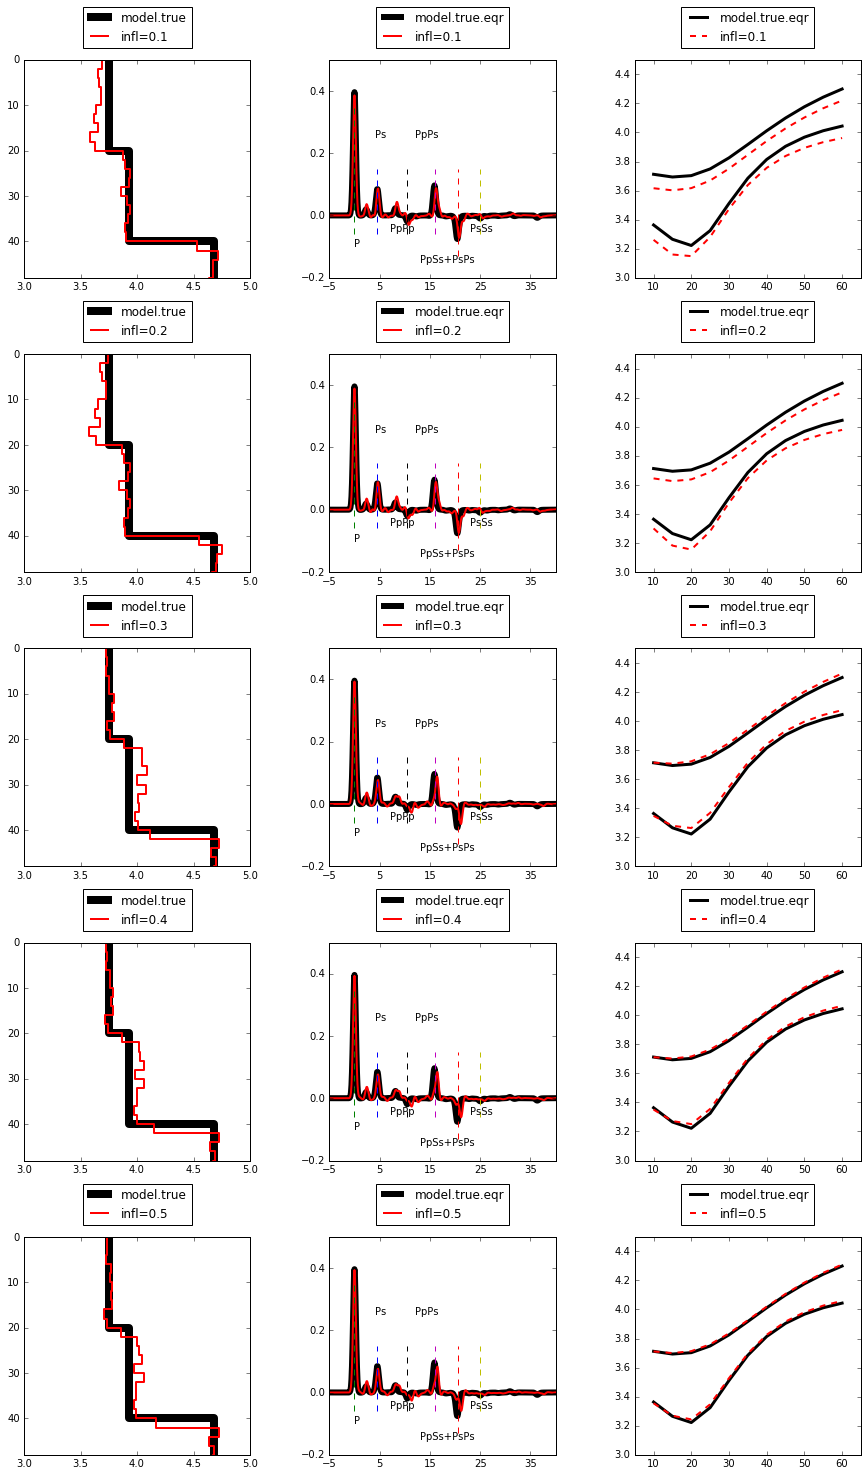

In [684]:
fig = mpl.figure(figsize = (15,25))
gs1 = gridspec.GridSpec(5,3)
gs1.update(wspace=0.35, hspace=0.35)

for i,j in enumerate(vs_4_1):
            ax1 = mpl.subplot(gs1[i,0])
            ax1.step(vs_true,H_true_vs,'k',lw=8,where='post',label='model.true')
            ax1.step(j,prof_4_1[i],'r',lw=2,where='post',label='infl='+model_vs_jointsmthlabel_4_1[i])
            ax1.set_xlim([3,5])
            ax1.set_ylim([48,0])
            ax1.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
            
            
for i,j in enumerate(RF_joint_6_data_4_1):
        ax2 = mpl.subplot(gs1[i,1])    
        ax2.plot(RF[0].times()-5,RF[0].data,'k',lw=6,label='model.true.eqr')
        ax2.plot(RF_joint_6_time_4_1[i]-5,j,'r',lw=2,label='infl='+model_vs_jointsmthlabel_4_1[i])
        ax2.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
        ax2.text(0, -0.1, 'P')
        ax2.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
        ax2.text(4, 0.25, 'Ps')
        ax2.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
        ax2.text(7, -0.05, 'PpPp')    
        ax2.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
        ax2.text(12, 0.25, 'PpPs')
        ax2.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
        ax2.text(13, -0.15, 'PpSs+PsPs')
        ax2.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
        ax2.text(23, -0.05, 'PsSs')
        ax2.set_xlim(-5,40)
        ax2.set_ylim(-0.2,0.5)
        ax2.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
        start, end = ax2.get_xlim()
        ax2.xaxis.set_ticks(np.arange(start, end, 10))
        start1, end1 = ax2.get_ylim()
        ax2.yaxis.set_ticks(np.arange(start1, end1, 0.2))
        

for i,j in enumerate(CD_l_cur_4_1):
        ax3 = mpl.subplot(gs1[i,2])
        ax3.plot(group_periods,group_ray_periods,'k',lw=3,label='model.true.eqr')
        ax3.plot(group_periods,group_love_curves,'k',lw=3)
        ax3.plot(periodsr_4_1[i],CD_r_cur_4_1[i],'--r',lw=2,label='infl='+model_vs_jointsmthlabel_4_1[i])
        ax3.plot(periodsl_4_1[i],CD_l_cur_4_1[i],'--r',lw=2)
        ax3.set_xlim(5,65)
        ax3.set_ylim(3,4.5)
        ax3.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)

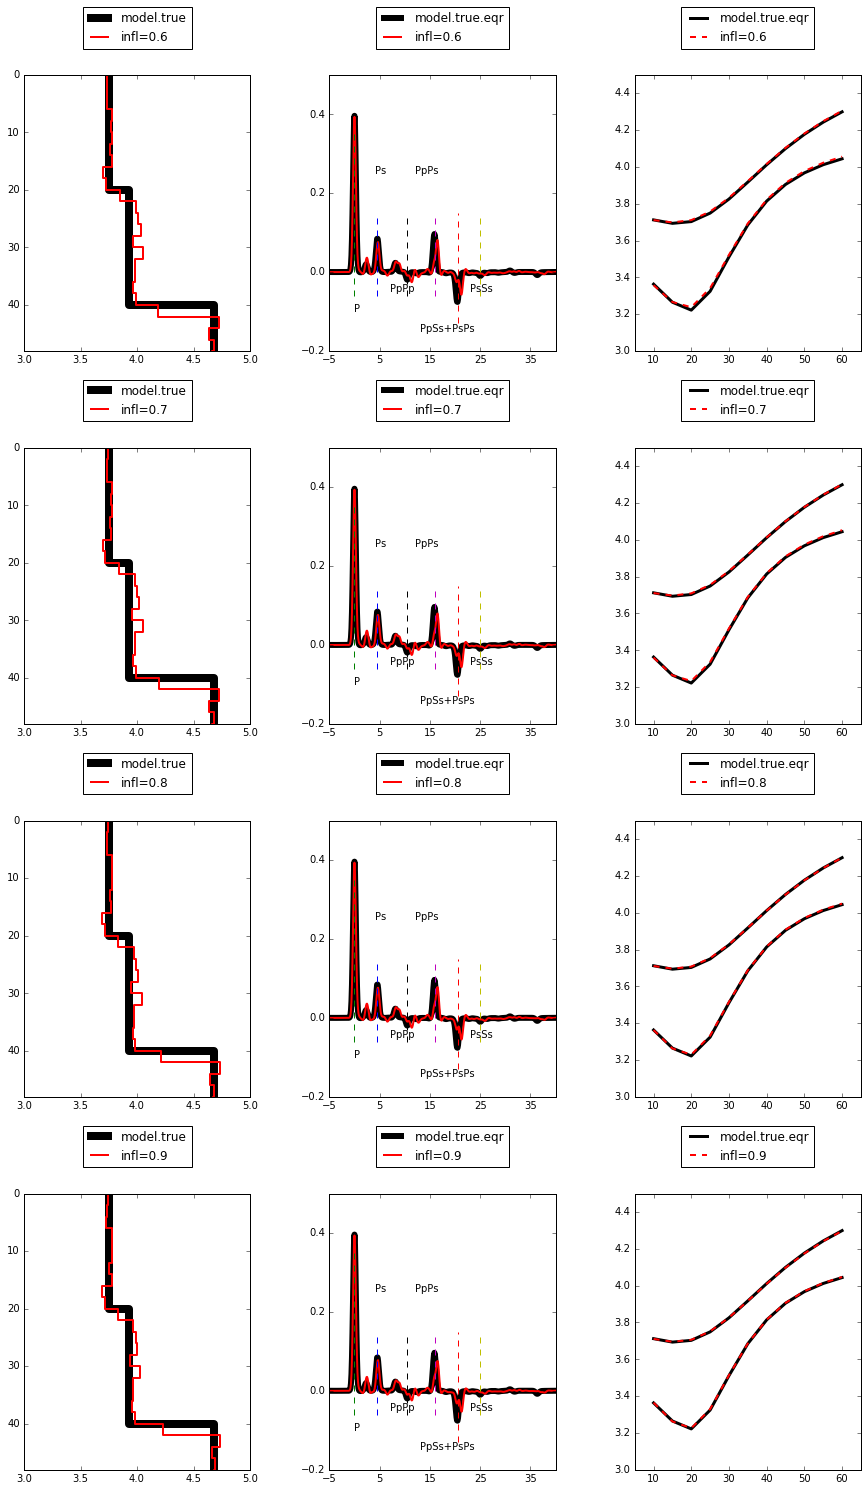

In [685]:
fig = mpl.figure(figsize = (15,25))
gs1 = gridspec.GridSpec(4,3)
gs1.update(wspace=0.35, hspace=0.35)

for i,j in enumerate(vs_4_2):
            ax1 = mpl.subplot(gs1[i,0])
            ax1.step(vs_true,H_true_vs,'k',lw=8,where='post',label='model.true')
            ax1.step(j,prof_4_2[i],'r',lw=2,where='post',label='infl='+model_vs_jointsmthlabel_4_2[i])
            ax1.set_xlim([3,5])
            ax1.set_ylim([48,0])
            ax1.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
            
            
for i,j in enumerate(RF_joint_6_data_4_2):
        ax2 = mpl.subplot(gs1[i,1])    
        ax2.plot(RF[0].times()-5,RF[0].data,'k',lw=6,label='model.true.eqr')
        ax2.plot(RF_joint_6_time_4_2[i]-5,j,'r',lw=2,label='infl='+model_vs_jointsmthlabel_4_2[i])
        ax2.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
        ax2.text(0, -0.1, 'P')
        ax2.axvline(x=4.5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
        ax2.text(4, 0.25, 'Ps')
        ax2.axvline(x=10.5, ymin=0.2, ymax=0.5, ls='dashed',c='k')
        ax2.text(7, -0.05, 'PpPp')    
        ax2.axvline(x=16, ymin=0.2, ymax=0.5, ls='dashed',c='m')
        ax2.text(12, 0.25, 'PpPs')
        ax2.axvline(x=20.5, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
        ax2.text(13, -0.15, 'PpSs+PsPs')
        ax2.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
        ax2.text(23, -0.05, 'PsSs')
        ax2.set_xlim(-5,40)
        ax2.set_ylim(-0.2,0.5)
        ax2.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)
        start, end = ax2.get_xlim()
        ax2.xaxis.set_ticks(np.arange(start, end, 10))
        start1, end1 = ax2.get_ylim()
        ax2.yaxis.set_ticks(np.arange(start1, end1, 0.2))
        

for i,j in enumerate(CD_l_cur_4_2):
        ax3 = mpl.subplot(gs1[i,2])
        ax3.plot(group_periods,group_ray_periods,'k',lw=3,label='model.true.eqr')
        ax3.plot(group_periods,group_love_curves,'k',lw=3)
        ax3.plot(periodsr_4_2[i],CD_r_cur_4_2[i],'--r',lw=2,label='infl='+model_vs_jointsmthlabel_4_2[i])
        ax3.plot(periodsl_4_2[i],CD_l_cur_4_2[i],'--r',lw=2)
        ax3.set_xlim(5,65)
        ax3.set_ylim(3,4.5)
        ax3.legend(bbox_to_anchor=(0.5, 1.25), loc=9, borderaxespad=0.1)

<h2 align="center">Calculando a RMS entre as Funções do Receptor e Curvas de Dispersão geradas pela inversão jointsmth e pelos dados observados</h2>

<h5>RMS entre as Funções do Receptor preditas e os dados observados</h5>

In [686]:
RF_RMS_4 = []
for k,l in enumerate(RF_joint_6_data_4):
    RF_RMS_4.append(rootMeanSquare(l,RF_4[0].data))

<h5>RMS entre as Curvas de Dispersão preditas e os dados observados</h5>

In [700]:
CD_r_RMS_4 = []
CD_l_RMS_4 = []

for k,l in enumerate(CD_r_cur_4):
    CD_r_RMS_4.append(rootMeanSquare(CD_r_cur_4[k],group_ray_periods))
    CD_l_RMS_4.append(rootMeanSquare(CD_l_cur_4[k],group_love_curves))

<h5>Gráfico	  do	  RMS	  para a	Curva de Dispersão da onda Rayleigh	  em	  função	  do	  RMS	  das	  Funções	  de	  Receptor</h5>

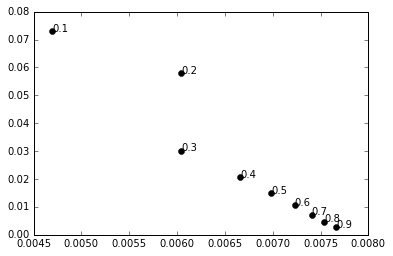

In [710]:
for i,j in enumerate(RF_RMS_4):
    mpl.plot(j,CD_r_RMS_4[i],'ok')
    mpl.text(j,CD_r_RMS_4[i],model_vs_jointsmthlabel_4[i])

<h5>Gráfico	  do	  RMS	  para a	Curva de Dispersão da onda Love	  em	  função	  do	  RMS	  das	  Funções	  de	  Receptor</h5>

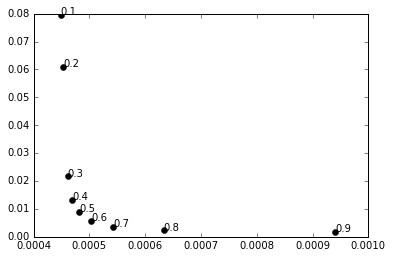

In [706]:
for i,j in enumerate(RF_RMS[1:]):
    mpl.plot(j,CD_l_RMS_4[i],'ok')
    mpl.text(j,CD_l_RMS_4[i],model_vs_jointsmthlabel_4[i])